In [145]:
#pip install geopy
#pip install folium

# importing libraries

In [3]:
# importing librariesimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# setting the dataframe output

In [4]:
sns.set(rc={'figure.figsize': (13, 12)});
plt.figure(figsize=(14, 16));
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=FutureWarning)

<Figure size 1008x1152 with 0 Axes>

# loading the data

In [5]:
data = pd.read_csv('Car_sale_ads.csv')

# A glimpse of data

In [6]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN         NaN   
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
4        Manual  small_cars          3.0    blue            NaN         NaN   

  First_registration_date  Offer_publication_date  \
0                     NaN              04/05/2021   
1                     NaN              03/05/2021   
2                     NaN              03/05/2021   
3                     NaN              30/04/2021   
4                     NaN              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

there are 25 features. as mentioned before:
ID - unique ID of offer
Price - value of the price
Currency - currency of the price (mostly polish złoty, but also some euro)
Condition - new or used
Vehicle_brand - brand of vehicle in offer
Vehicle_model - model of vehicle in offer
Vehicle_generation - generation of vehicle in offer
Vehicle_version - version of vehicle in offer
Production_year - year of car production
Mileage_km - total distance that the car has driven in kilometers
Power_HP - car engine power in horsepower
Displacement_cm3 - car engine size in cubic centimeters
Fuel_type - car fuel type
CO2_emissions - car CO2 emissions in g/km
Drive - type of car drive
Transmission - type of car transmission
Type - car body style
Doors_number - number of car doors
Colour - car body color
Origin_country - country of origin of the car
First_owner - whether the owner is the first owner
First_registration_date - date of first registration
Offer_publication_date - date of publication of the offer
Offer_location - address provided by the issuer
Features - listed car features (ABS, airbag, parking sensors e.t.c)

## data types

In [7]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

As we can see we've got no empty (null) rows.Technically this wouldn't be a null field but in the context of our data it would definitely have the same meaning of Null.

## null values

In [8]:
data.isna().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

there are a lot of missing values but they're going to be taken care of soon.

## central tendencies of numerical columns

In [9]:
# we don't really care about the count so we can drop it
data.describe().drop(['count'], axis=0)

Index         Price  Production_year    Mileage_km     Power_HP  \
mean  104151.500000  6.305383e+04      2012.098241  1.502768e+05   151.836281   
std    60132.329574  8.665967e+04         6.998414  2.937447e+06    77.683546   
min        0.000000  5.000000e+02      1915.000000  1.000000e+00     1.000000   
25%    52075.750000  1.780000e+04      2008.000000  5.300000e+04   105.000000   
50%   104151.500000  3.570000e+04      2013.000000  1.445660e+05   136.000000   
75%   156227.250000  7.599000e+04      2017.000000  2.060000e+05   172.000000   
max   208303.000000  6.999000e+06      2021.000000  1.111111e+09  1398.000000   

      Displacement_cm3  CO2_emissions  Doors_number  
mean       1882.567147   3.191564e+05      4.637138  
std         729.609660   7.291396e+07      0.768559  
min         400.000000   1.000000e+00      1.000000  
25%        1461.000000   1.200000e+02      5.000000  
50%        1798.000000   1.400000e+02      5.000000  
75%        1997.000000   1.640000e+02      5.000000  
max        8400.000000   2.000000e+10     55.000000

# data cleaning

## data types

In [10]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN         NaN   
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
4        Manual  small_cars          3.0    blue            NaN         NaN   

  First_registration_date  Offer_publication_date  \
0                     NaN              04/05/2021   
1                     NaN              03/05/2021   
2                     NaN              03/05/2021   
3                     NaN              30/04/2021   
4                     NaN              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

### changing dtypes to time 

In [11]:
data['Offer_publication_date'] = pd.to_datetime(data['Offer_publication_date'], infer_datetime_format=True,
                                                errors='coerce')
data['First_registration_date'] = pd.to_datetime(data['First_registration_date'], infer_datetime_format=True,
                                                 errors='coerce')

In [12]:
print(data['First_registration_date'].dtype)
print(data['Offer_publication_date'].dtype)
data['Offer_publication_date'].dt.month

datetime64[ns]
datetime64[ns]


0         4.0
1         3.0
2         3.0
3         NaN
4         NaN
         ... 
208299    NaN
208300    2.0
208301    NaN
208302    NaN
208303    4.0
Name: Offer_publication_date, Length: 208304, dtype: float64

we have taken care of numerical and date ypes. let's take a look at the 'object' type features.

In [13]:
data.dtypes[(data.dtypes == 'object')]

Currency              object
Condition             object
Vehicle_brand         object
Vehicle_model         object
Vehicle_version       object
Vehicle_generation    object
Fuel_type             object
Drive                 object
Transmission          object
Type                  object
Colour                object
Origin_country        object
First_owner           object
Offer_location        object
Features              object
dtype: object

## data format similarities

In [15]:
data['Currency'].value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

As we can see we've got 2 types of currencies here, the Euro and the polish zloty, because we only have a few EUR values in comparision to PlN. but since the extention rate differs frome time to time. we need to understand the time the dealership has been done!

In [16]:
data['Offer_publication_date'].dt.year.value_counts()

2021.0    103356
Name: Offer_publication_date, dtype: int64

so since all the dealership has been done in 2021. we are going to be using the 2021 EUR-PLN exchange rate.

In [18]:
EXCHANGE_RATE_EUR_PLN_2021 = 4.7033
data[(data['Currency'] == 'EUR')]['Price'] = data[(data['Currency'] == 'EUR')]['Price'] * EXCHANGE_RATE_EUR_PLN_2021

as shown above, we only have one type of currency now.

In [19]:
data['Currency'] = 'PLN'
data['Currency'].value_counts()

PLN    208304
Name: Currency, dtype: int64

In [20]:
data['Condition'].value_counts()

Used    182850
New      25454
Name: Condition, dtype: int64

In [21]:
data['Vehicle_brand'].value_counts()

Volkswagen    18455
BMW           16983
Audi          16730
Opel          16322
Ford          16007
              ...  
FAW               1
MAN               1
Talbot            1
NSU               1
Vanderhall        1
Name: Vehicle_brand, Length: 108, dtype: int64

In [22]:
data['Vehicle_model'].value_counts()

Astra      5302
A4         4582
Seria 3    4570
Golf       4164
Passat     4049
           ... 
Roma          1
HQ            1
Alaskan       1
10            1
750           1
Name: Vehicle_model, Length: 1203, dtype: int64

In [23]:
data['Vehicle_version'].value_counts()

2.0 TDI                             888
1.6                                 842
Standard                            647
2.0 TDCi Titanium                   619
1.2                                 604
                                   ... 
Coupe 350 d 4-Matic Premium Plus      1
250 T CDI DPF 4Matic 7G-TRONIC        1
350 BlueTEC DPF 7G-TRONIC             1
65 AMG L AMG SPEEDSHIFT               1
Tourist 1.0 S                         1
Name: Vehicle_version, Length: 19056, dtype: int64

In [24]:
data['Vehicle_generation'].value_counts()

II (2012-)         3758
II (2010-)         2280
III (2013-)        2205
II (2016-)         2024
A (2008-2017)      1945
                   ... 
II (1995-1999)        1
II (1995-2001)        1
II (1998-2001)        1
I (1993-1998)         1
Mk3 (1989-1996)       1
Name: Vehicle_generation, Length: 569, dtype: int64

In [25]:
data['Fuel_type'].value_counts()

Gasoline          99352
Diesel            92415
Gasoline + LPG     9027
Hybrid             5883
Electric           1553
Gasoline + CNG       70
Hydrogen              2
Ethanol               2
Name: Fuel_type, dtype: int64

In [25]:
data['Drive'].value_counts()

Front wheels                    139944
Rear wheels                      18081
4x4 (permanent)                  16986
4x4 (attached automatically)     15420
4x4 (attached manually)           2797
Name: Drive, dtype: int64

In [26]:
data['Transmission'].value_counts()

Manual       132889
Automatic     74936
Name: Transmission, dtype: int64

In [27]:
data['Type'].value_counts()

SUV              41587
station_wagon    40228
sedan            33271
compact          32150
city_cars        24110
minivan          22114
coupe             6374
small_cars        5974
convertible       2496
Name: Type, dtype: int64

In [28]:
data['Colour'].value_counts()

black       50355
gray        31826
silver      30886
white       30412
blue        21707
other       13805
red          9799
brown        5547
green        3633
burgundy     3442
golden       2677
beige        2488
yellow        961
violet        766
Name: Colour, dtype: int64

In [30]:
data['Origin_country'].value_counts()

Poland            57127
Germany           38166
France             4874
United States      4099
Belgium            4055
Switzerland        2152
Netherlands        1796
Italy              1385
Austria            1218
Sweden              733
Denmark             661
Canada              596
Other               378
Czech Republic      259
Great Britain       219
Luxembourg          210
Spain               128
Finland              62
Slovakia             48
Norway               46
Slovenia             22
Russia               18
Estonia               9
Ireland               8
Greece                7
Ukraine               6
Hungary               5
Lithuania             5
Monaco                4
Belarus               3
Romania               3
Croatia               2
Turkey                2
Iceland               2
Latvia                2
Bulgaria              1
Liechtenstein         1
Name: Origin_country, dtype: int64

unlike 'curency' other features does not need any reforming in their format.

In [31]:
data['First_owner'].value_counts()

Yes    65094
Name: First_owner, dtype: int64

as shown here we have a yes/no answer but a lot of our values are 'null' so we're going to take care of them soon.

In [32]:
data['Offer_location'].value_counts()

Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)    1329
Radom, Mazowieckie                               1207
Kielce, Świętokrzyskie                           1112
Lublin, Lubelskie                                1082
Bydgoszcz, Kujawsko-pomorskie                     902
                                                 ... 
Stawno, kamieński, Zachodniopomorskie               1
Przydwórz, wąbrzeski, Kujawsko-pomorskie            1
Stary Lubotyń, ostrowski, Mazowieckie               1
Korbielów, żywiecki, Śląskie                        1
Chęciny, garwoliński, Mazowieckie                   1
Name: Offer_location, Length: 13635, dtype: int64

In [33]:
data['Features'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 13337
['Automatic air conditioning']                                                                                                                                                                                                                                                 

It's a list made up of the features of the car. It is important to note that we've got about 13,000 rows where this list is empty. This doesn't mean that the car doesn't have any features, it just means that the person that put up the offer did not enter the specific features with the post. it is what is mentioned in farsi as "option".

In [35]:
# an instance
data['Features'][3]

"['ABS', 'Electric front windows', 'Drivers airbag', 'Power steering', 'Bluetooth', 'AUX socket', 'On-board computer', 'Xenon lights', 'CD', 'Electrically adjustable mirrors', 'Passengers airbag', 'Alloy wheels', 'Rain sensor', 'USB socket', 'MP3', 'Multifunction steering wheel', 'Central locking', 'Immobilizer', 'Factory radio', 'ASR (traction control)', 'ESP(stabilization of the track)', 'Automatic air conditioning', 'Front side airbags']"

as seen It's a string.(the format) What we could do for this feature is take each occurrence of a feature and create a column named after it which will have values 0 for 'does not have' and 1 for 'has'. There are drawbacks to this method though. Maybe the same features are written in a different way. Another issue would be the 13,000 missing values. We could perhaps imputate them in a way but we definitely can't leave them empty. Another problem would also be the computational cost of going into every row, checking the car-feature and then creating the data accordingly.

## creating some new features based on options("features")

In [36]:
def process_car_features_list(row):
    # convert list to native python list
    native_list = eval(row[-1])
    for item in native_list:
        if item in data.columns:
            data.loc[row.name, item] = 1
        else:
            data[item] = np.nan
    return row


_ = data.apply(process_car_features_list, axis=1)

In [38]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   CD changer  Auxiliary heating Heated rear seats  \
0         NaN                NaN               NaN   
1         NaN                NaN               NaN   
2         NaN                NaN               NaN   
3         NaN                NaN               NaN   
4         NaN                NaN               NaN   

   Four-zone air conditioning TV tuner Roof rails Active cruise control  Hook  \
0                         NaN      NaN        NaN                   NaN   NaN   
1                         NaN      NaN        NaN                   NaN   NaN   
2                         NaN      NaN        NaN                   NaN   NaN   
3                         NaN      NaN        NaN                   NaN   NaN   
4                         NaN      NaN        NaN                   NaN   NaN   

  Lane assistant HUD(head-up display)  
0            NaN                  NaN  
1            NaN                  NaN  
2            NaN                  NaN  
3            NaN                  NaN  
4            NaN                  NaN  

[5 rows x 95 columns]

Now, our original Dataframe had 25 features and now it has 96... Those extra 71 features came from our attempt to convert the "feature" column to a more usable type. so, let's just split them.

In [39]:
car_features = data.iloc[:, 25:]
car_features.insert(0, column='Index', value=data['Index'])
data = data.iloc[:, :24]

In [40]:
car_features.head()

Index  ABS  Electric front windows  Drivers airbag  Power steering  \
0      0  NaN                     NaN             NaN             NaN   
1      1  NaN                     NaN             NaN             NaN   
2      2  NaN                     NaN             NaN             NaN   
3      3  1.0                     1.0             1.0             1.0   
4      4  1.0                     1.0             1.0             1.0   

   ASR (traction control)  Rear view camera  Heated side mirrors   CD  \
0                     NaN               NaN                  NaN  NaN   
1                     NaN               NaN                  NaN  NaN   
2                     NaN               NaN                  NaN  NaN   
3                     1.0               NaN                  NaN  1.0   
4                     1.0               NaN                  1.0  NaN   

   Electrically adjustable mirrors  ...  CD changer  Auxiliary heating  \
0                              NaN  ...         NaN                NaN   
1                              NaN  ...         NaN                NaN   
2                              NaN  ...         NaN                NaN   
3                              1.0  ...         NaN                NaN   
4                              1.0  ...         NaN                NaN   

   Heated rear seats  Four-zone air conditioning  TV tuner  Roof rails  \
0                NaN                         NaN       NaN         NaN   
1                NaN                         NaN       NaN         NaN   
2                NaN                         NaN       NaN         NaN   
3                NaN                         NaN       NaN         NaN   
4                NaN                         NaN       NaN         NaN   

   Active cruise control  Hook  Lane assistant  HUD(head-up display)  
0                    NaN   NaN             NaN                   NaN  
1                    NaN   NaN             NaN                   NaN  
2                    NaN   NaN             NaN                   NaN  
3                    NaN   NaN             NaN                   NaN  
4                    NaN   NaN             NaN                   NaN  

[5 rows x 71 columns]

In [39]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

          Drive  Transmission        Type  Doors_number  Colour  \
0  Front wheels        Manual  small_cars           3.0    gray   
1  Front wheels        Manual       coupe           2.0  silver   
2           NaN     Automatic  small_cars           3.0  silver   
3  Front wheels        Manual  small_cars           3.0    gray   
4           NaN        Manual  small_cars           3.0    blue   

  Origin_country First_owner  First_registration_date Offer_publication_date  \
0            NaN         NaN                      NaT             2021-04-05   
1            NaN         NaN                      NaT             2021-03-05   
2            NaN         NaN                      NaT             2021-03-05   
3            NaN         NaN                      NaT                    NaT   
4            NaN         NaN                      NaT                    NaT   

                                      Offer_location  
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...  
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...  
2                   Warszawa, Mazowieckie, Białołęka  
3                                  Jaworzno, Śląskie  
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...  

[5 rows x 24 columns]

## Missing Values

In [41]:
# Missing values by order
data.isna().sum()[(data.isna().sum() != 0)].sort_values(ascending=False)

First_owner                143210
First_registration_date    122083
CO2_emissions              114257
Offer_publication_date     104948
Origin_country              89992
Vehicle_version             70222
Vehicle_generation          60444
Drive                       15076
Displacement_cm3             1966
Doors_number                 1487
Mileage_km                    983
Power_HP                      643
Transmission                  479
dtype: int64

now that we have a general idea of which columns have missing values and how many we can start deciding what to do about them. But to do that we also need to have some context about our data. So we'll spend some time trying to find smart solutions dealing with our missing values.

also, we need to know the missing types: Missing at Random (MAR),  Missing Completely at Random (MCAR), or Missing Not at Random (MNAR). Knowing that will help us in deciding how to deal with the missing data.

A good indicator for that would be taking our columns with the missing values and plotting them against other features to see if there might be some type of correlation anywhere that might help us decide why this data is missing.

We have a problem, though. We can't plot data that has missing values(NaN). So what we'll do is create a temporary dataframe where we'll just replace our missing values with either "missing" for categorical values, "-1" for numerical variables.

In [42]:
data_mutated_nan_to_placeholder = data.copy(deep=True)
data_mutated_nan_to_placeholder.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

          Drive  Transmission        Type  Doors_number  Colour  \
0  Front wheels        Manual  small_cars           3.0    gray   
1  Front wheels        Manual       coupe           2.0  silver   
2           NaN     Automatic  small_cars           3.0  silver   
3  Front wheels        Manual  small_cars           3.0    gray   
4           NaN        Manual  small_cars           3.0    blue   

  Origin_country First_owner  First_registration_date Offer_publication_date  \
0            NaN         NaN                      NaT             2021-04-05   
1            NaN         NaN                      NaT             2021-03-05   
2            NaN         NaN                      NaT             2021-03-05   
3            NaN         NaN                      NaT                    NaT   
4            NaN         NaN                      NaT                    NaT   

                                      Offer_location  
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...  
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...  
2                   Warszawa, Mazowieckie, Białołęka  
3                                  Jaworzno, Śląskie  
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...  

[5 rows x 24 columns]

In [43]:
#missing
from datetime import datetime

for col in data_mutated_nan_to_placeholder.columns:
    if data_mutated_nan_to_placeholder[col].dtype == 'object':
        data_mutated_nan_to_placeholder[col].fillna(value='Missing', inplace=True)
    elif data_mutated_nan_to_placeholder[col].dtype == 'int64':
        data_mutated_nan_to_placeholder[col].fillna(value=-1, inplace=True)
    elif data_mutated_nan_to_placeholder[col].dtype == 'float64':
        data_mutated_nan_to_placeholder[col].fillna(value=-1.0, inplace=True)
    else:  # date
        data_mutated_nan_to_placeholder[col].fillna(value=datetime(1999, 9, 19, 19, 19, 19), inplace=True)

missing: for 'object' -1 for 'int64' -1.0 for 'float64' and 1999 for datacv

not missing: for 'object' 1 for 'int64' 1.0 for 'float64' and 2022 for datacv

In [44]:
# not missing
data_mutated_non_nan_to_placeholder = data_mutated_nan_to_placeholder.copy(deep=True)
for col in data_mutated_non_nan_to_placeholder.columns:
    if data_mutated_non_nan_to_placeholder[col].dtype == 'object':
        data_mutated_non_nan_to_placeholder[col] = data_mutated_non_nan_to_placeholder[col].map(
            lambda x: 'Not Missing' if x != 'Missing' else x)
    elif data_mutated_non_nan_to_placeholder[col].dtype == 'int64':
        data_mutated_non_nan_to_placeholder[col] = data_mutated_non_nan_to_placeholder[col].map(
            lambda x: 1 if x != -1 else x)
    elif data_mutated_non_nan_to_placeholder[col].dtype == 'float64':
        data_mutated_non_nan_to_placeholder[col] = data_mutated_non_nan_to_placeholder[col].map(
            lambda x: 1.0 if x != -1.0 else x)
    else:  # date
        data_mutated_non_nan_to_placeholder[col] = data_mutated_non_nan_to_placeholder[col].map(
            lambda x: datetime(2022, 12, 12, 12, 12, 12) if x != datetime(1999, 9, 19, 19, 19, 19) else x)

In [44]:
data_mutated_nan_to_placeholder.head(100)

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0       0  86200      PLN       New        Abarth           595   
1       1  43500      PLN      Used        Abarth         Other   
2       2  44900      PLN      Used        Abarth           500   
3       3  39900      PLN      Used        Abarth           500   
4       4  97900      PLN       New        Abarth           595   
..    ...    ...      ...       ...           ...           ...   
95     95  19900      PLN      Used         Aixam          City   
96     96  15900      PLN      Used         Aixam           GTO   
97     97  12200      PLN      Used         Aixam          City   
98     98  15900      PLN      Used         Aixam     Crossline   
99     99  18900      PLN      Used         Aixam          City   

   Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0          Missing            Missing             2021         1.0  ...   
1          Missing            Missing             1974     59000.0  ...   
2          Missing            Missing             2018     52000.0  ...   
3          Missing            Missing             2012     29000.0  ...   
4          Missing            Missing             2021       600.0  ...   
..             ...                ...              ...         ...  ...   
95         Missing            Missing             2011     21795.0  ...   
96         Missing            Missing             2012     60000.0  ...   
97         Missing            Missing             2007     79200.0  ...   
98         Missing            Missing             2007     88000.0  ...   
99         Missing            Missing             2009     39757.0  ...   

           Drive  Transmission        Type  Doors_number  Colour  \
0   Front wheels        Manual  small_cars           3.0    gray   
1   Front wheels        Manual       coupe           2.0  silver   
2        Missing     Automatic  small_cars           3.0  silver   
3   Front wheels        Manual  small_cars           3.0    gray   
4        Missing        Manual  small_cars           3.0    blue   
..           ...           ...         ...           ...     ...   
95  Front wheels     Automatic  small_cars           3.0     red   
96  Front wheels     Automatic  small_cars           3.0  silver   
97  Front wheels     Automatic  small_cars           3.0    blue   
98       Missing     Automatic  small_cars           3.0   black   
99       Missing     Automatic  small_cars           2.0   white   

   Origin_country First_owner  First_registration_date Offer_publication_date  \
0         Missing     Missing      1999-09-19 19:19:19    2021-04-05 00:00:00   
1         Missing     Missing      1999-09-19 19:19:19    2021-03-05 00:00:00   
2         Missing     Missing      1999-09-19 19:19:19    2021-03-05 00:00:00   
3         Missing     Missing      1999-09-19 19:19:19    1999-09-19 19:19:19   
4         Missing     Missing      1999-09-19 19:19:19    1999-09-19 19:19:19   
..            ...         ...                      ...                    ...   
95        Missing     Missing      1999-09-19 19:19:19    1999-09-19 19:19:19   
96        Missing         Yes      1999-09-19 19:19:19    1999-09-19 19:19:19   
97        Missing     Missing      2007-03-21 00:00:00    1999-09-19 19:19:19   
98        Missing     Missing      1999-09-19 19:19:19    2021-04-05 00:00:00   
99        Missing     Missing      1999-09-19 19:19:19    1999-09-19 19:19:19   

                                       Offer_location  
0   ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...  
1   kanonierska12 - 04-425 Warszawa, Rembertów (Po...  
2                    Warszawa, Mazowieckie, Białołęka  
3                                   Jaworzno, Śląskie  
4   ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...  
..                                                ...  
95               Zduńska Wola, zduńskowolski, Łódzkie  
96                           Lipniki, nyski, Opolskie  
97  

In [45]:
data_mutated_non_nan_to_placeholder.head(100)

Index  Price     Currency    Condition Vehicle_brand Vehicle_model  \
0       1      1  Not Missing  Not Missing   Not Missing   Not Missing   
1       1      1  Not Missing  Not Missing   Not Missing   Not Missing   
2       1      1  Not Missing  Not Missing   Not Missing   Not Missing   
3       1      1  Not Missing  Not Missing   Not Missing   Not Missing   
4       1      1  Not Missing  Not Missing   Not Missing   Not Missing   
..    ...    ...          ...          ...           ...           ...   
95      1      1  Not Missing  Not Missing   Not Missing   Not Missing   
96      1      1  Not Missing  Not Missing   Not Missing   Not Missing   
97      1      1  Not Missing  Not Missing   Not Missing   Not Missing   
98      1      1  Not Missing  Not Missing   Not Missing   Not Missing   
99      1      1  Not Missing  Not Missing   Not Missing   Not Missing   

   Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0          Missing            Missing                1         1.0  ...   
1          Missing            Missing                1         1.0  ...   
2          Missing            Missing                1         1.0  ...   
3          Missing            Missing                1         1.0  ...   
4          Missing            Missing                1         1.0  ...   
..             ...                ...              ...         ...  ...   
95         Missing            Missing                1         1.0  ...   
96         Missing            Missing                1         1.0  ...   
97         Missing            Missing                1         1.0  ...   
98         Missing            Missing                1         1.0  ...   
99         Missing            Missing                1         1.0  ...   

          Drive  Transmission         Type  Doors_number       Colour  \
0   Not Missing   Not Missing  Not Missing           1.0  Not Missing   
1   Not Missing   Not Missing  Not Missing           1.0  Not Missing   
2       Missing   Not Missing  Not Missing           1.0  Not Missing   
3   Not Missing   Not Missing  Not Missing           1.0  Not Missing   
4       Missing   Not Missing  Not Missing           1.0  Not Missing   
..          ...           ...          ...           ...          ...   
95  Not Missing   Not Missing  Not Missing           1.0  Not Missing   
96  Not Missing   Not Missing  Not Missing           1.0  Not Missing   
97  Not Missing   Not Missing  Not Missing           1.0  Not Missing   
98      Missing   Not Missing  Not Missing           1.0  Not Missing   
99      Missing   Not Missing  Not Missing           1.0  Not Missing   

   Origin_country  First_owner  First_registration_date  \
0         Missing      Missing      1999-09-19 19:19:19   
1         Missing      Missing      1999-09-19 19:19:19   
2         Missing      Missing      1999-09-19 19:19:19   
3         Missing      Missing      1999-09-19 19:19:19   
4         Missing      Missing      1999-09-19 19:19:19   
..            ...          ...                      ...   
95        Missing      Missing      1999-09-19 19:19:19   
96        Missing  Not Missing      1999-09-19 19:19:19   
97        Missing      Missing      2022-12-12 12:12:12   
98        Missing      Missing      1999-09-19 19:19:19   
99        Missing      Missing      1999-09-19 19:19:19   

   Offer_publication_date Offer_location  
0     2022-12-12 12:12:12    Not Missing  
1     2022-12-12 12:12:12    Not Missing  
2     2022-12-12 12:12:12    Not Missing  
3     1999-09-19 19:19:19    Not Missing  
4     1999-09-19 19:19:19    Not Missing  
..                    ...            ...  
95    1999-09-19 19:19:19    Not Missing  
96    1999-09-19 19:19:19    Not Missing  
97    1999-09-19 19:19:19    Not Missing  
98    2022-12-12 12:12:12    Not Missing  
99    1999-09-19 19:19:19    Not Missing  

[100 rows x 24 columns]

Before we move on, since all the deals are made in one year.We don't really need the exact dates. The year will be more than enough for our purpose. So we'll turn our dates into only the years

In [46]:
data['First_registration_date'] = data['First_registration_date'].map(lambda x: x.year if x != 'NaT' else x)
data['Offer_publication_date'] = data['Offer_publication_date'].map(lambda x: x.year if x != 'NaT' else x)
#
data_mutated_nan_to_placeholder['First_registration_date'] = data_mutated_nan_to_placeholder[
    'First_registration_date'].map(lambda x: x.year)
data_mutated_nan_to_placeholder['Offer_publication_date'] = data_mutated_nan_to_placeholder[
    'Offer_publication_date'].map(lambda x: x.year)
#
data_mutated_non_nan_to_placeholder['First_registration_date'] = data_mutated_non_nan_to_placeholder[
    'First_registration_date'].map(
    lambda x: x.year)
data_mutated_non_nan_to_placeholder['Offer_publication_date'] = data_mutated_non_nan_to_placeholder[
    'Offer_publication_date'].map(
    lambda x: x.year)


### Columns with the missing values:


In [47]:
data.isna().sum()[(data.isna().sum() != 0)].sort_values(ascending=False)

First_owner                143210
First_registration_date    122083
CO2_emissions              114257
Offer_publication_date     104948
Origin_country              89992
Vehicle_version             70222
Vehicle_generation          60444
Drive                       15076
Displacement_cm3             1966
Doors_number                 1487
Mileage_km                    983
Power_HP                      643
Transmission                  479
dtype: int64

In [48]:
data.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location'],
      dtype='object')

### plotting, to check out the correlation

### checking the corelation of  First_owner and the columns Price, Condition, Production_year, Mileage_km, CO2_emisiions

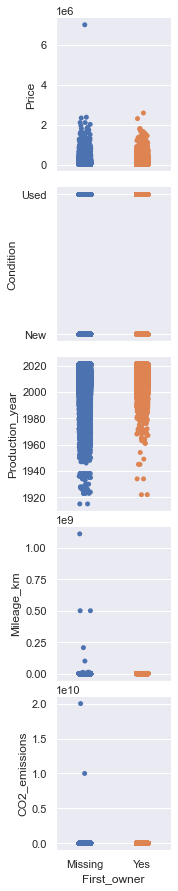

In [49]:
g = sns.PairGrid(data_mutated_nan_to_placeholder,
                 y_vars=['Price', 'Condition', 'Production_year', 'Mileage_km', 'CO2_emissions'],
                 x_vars='First_owner')
g.map(sns.stripplot);

### checking the corelation of  First_owner and columns Type, First_registration_date, Offer_publication_date, 

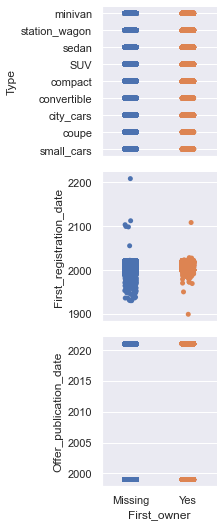

In [52]:
g = sns.PairGrid(data_mutated_nan_to_placeholder,
                 y_vars=['Type', 'First_registration_date', 'Offer_publication_date'],
                 x_vars='First_owner')
g.map(sns.stripplot);

As we can see the column of First_owner doesn't exactly have a specific pattern to it. As this column contains about 70% missing values it would be a good idea to drop it if we were building a ML model. We can classify this column as MAR.

### First_registration_date correlation and Type

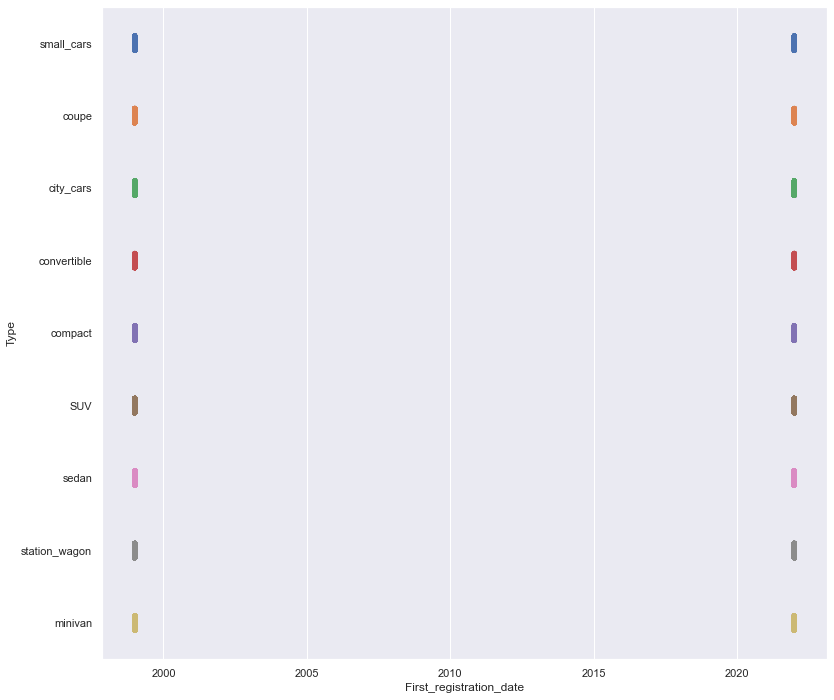

In [53]:
sns.stripplot(y=data_mutated_nan_to_placeholder['Type'],
              x=data_mutated_non_nan_to_placeholder['First_registration_date']);

Remember that 1999 means missing and 202 means not missing. As we can see here, they are about equally distributed so it doesn't give us anything.

### First_registration_date correlation and Mileage_km

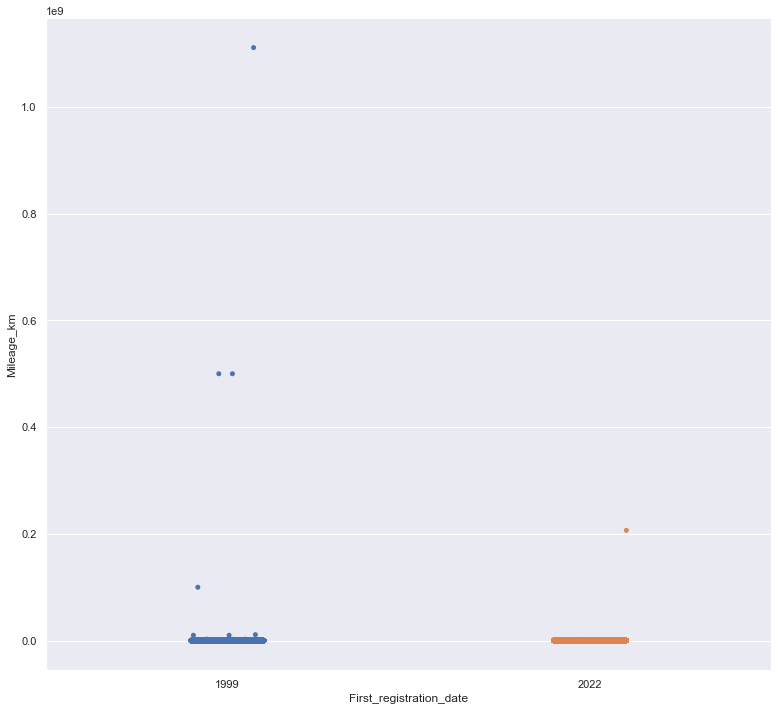

In [54]:
sns.stripplot(y=data_mutated_nan_to_placeholder['Mileage_km'],
              x=data_mutated_non_nan_to_placeholder['First_registration_date']);

Maybe the higher milage count, may have something to do with the missing values here but it's not very clear.

### First_registration_date correlation and Condition

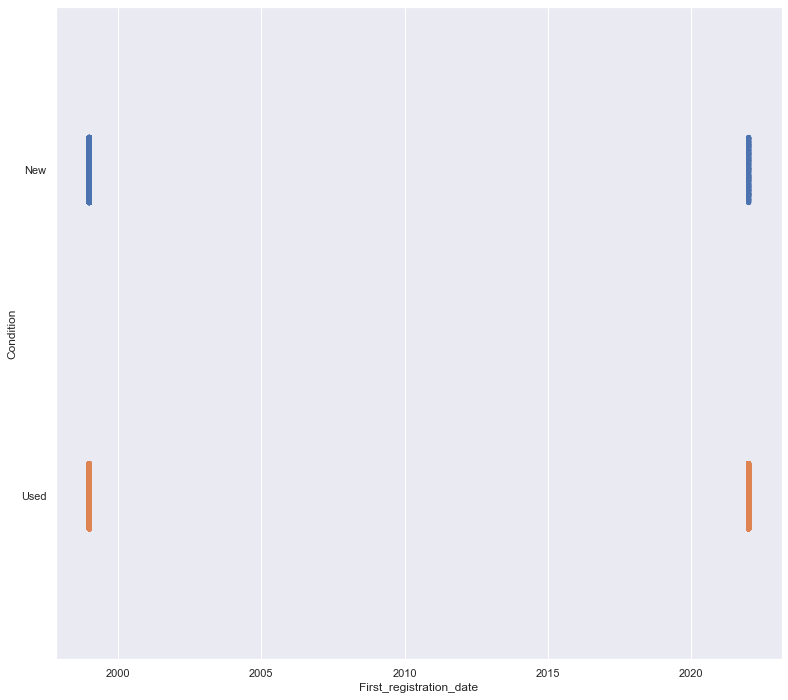

In [57]:
sns.stripplot(y=data_mutated_nan_to_placeholder['Condition'],
              x=data_mutated_non_nan_to_placeholder['First_registration_date']);

Even the Condition of the car has nothing to do with the data First registration date missing. They are about equally distributed.

### First_registration_date correlation and Production_year

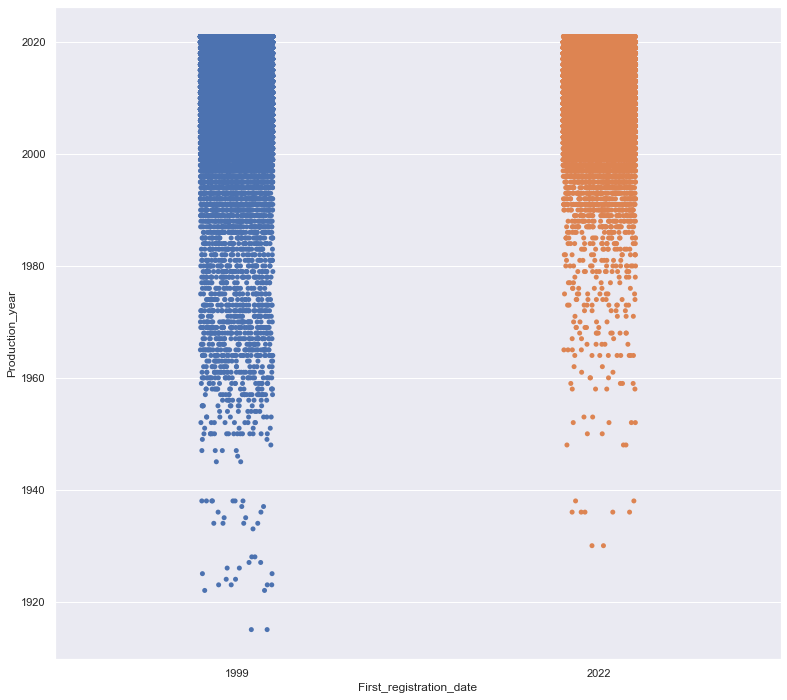

In [58]:
sns.stripplot(y=data_mutated_nan_to_placeholder['Production_year'],
              x=data_mutated_non_nan_to_placeholder['First_registration_date']);

Here we can see that a few of the missing values(1999) come from cars that had older production years. Maybe the seller thought that people wouldn't want very old cars so they left it out. But even-though one could argue for that case we just don't have enough evidence to support the data missing Not at random. So we have to also  classify this as Missing at Random(MAR).

We don't have to look at every column with missing values. Some have too few missing values where we can easily handle them and some columns are clear from the start that there can't be a good reason for them being missing. So we won't need to look at every single column with missing values.

Now we need to have an overview of all the options of dealing with missing values:

- Deleting the Entire Row
- Deleting the Entire Column
- Replacing With Arbitrary Value
- Replacing With Mean
- Replacing With Mode
- Replacing With Median
- Interpolation
- Imputation of Missing Values
- Univariate Approach
- Multivariate Approach
- Nearest Neighbors Imputations (KNNImputer)


### ML model

In [55]:
data.isna().sum()[(data.isna().sum() != 0)].sort_values(ascending=False)

First_owner                143210
First_registration_date    122083
CO2_emissions              114257
Offer_publication_date     104948
Origin_country              89992
Vehicle_version             70222
Vehicle_generation          60444
Drive                       15076
Displacement_cm3             1966
Doors_number                 1487
Mileage_km                    983
Power_HP                      643
Transmission                  479
dtype: int64

We can use the Mutual Information scores to have an overview of how big the association of a column is with another column.
We could have used pure correlation metrics like the Pearson Correlation statistic but the problem is that this measure only finds linear relationships, which can lead sometimes to a bad interpretation of the relation between two variables.

In [59]:
from sklearn.feature_selection import mutual_info_classif


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

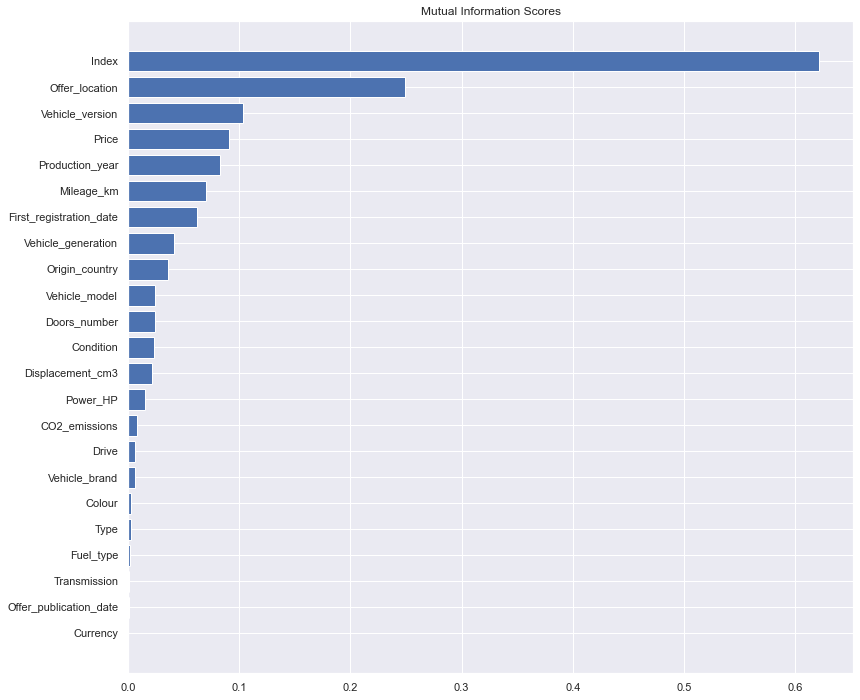

In [60]:
# First_owner
X_temp = data_mutated_nan_to_placeholder.copy()
X_temp_missing_or_not = data_mutated_non_nan_to_placeholder.copy()
y_temp = X_temp.pop('First_owner')
mi_scores = make_mi_scores(X_temp, y_temp)
plot_mi_scores(mi_scores)

In [62]:
data['First_owner'].fillna(value='Missing', inplace=True)

More than 70% of the data is missing and our attempts to understand any associations or correlations with this feature have been non-successful. Even the Mutual Information scores barely reach 0.25% which indicates a general lack associations between the missing values in this column. Because we're not using any ML algorithms at the moment it will suffice to just replace the missing values with the keyword "Missing" in the hopes of finding any insight in the future

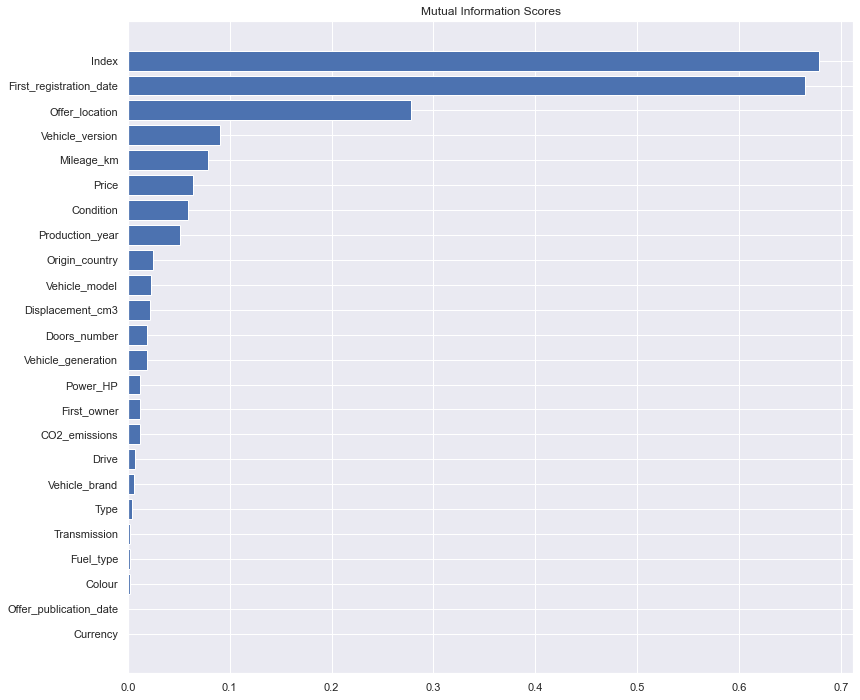

In [63]:
# First_registration_date
X_temp = data_mutated_nan_to_placeholder.copy()
X_temp_missing_or_not = data_mutated_non_nan_to_placeholder.copy()
y_temp = X_temp_missing_or_not.pop('First_registration_date')
mi_scores = make_mi_scores(X_temp, y_temp)
plot_mi_scores(mi_scores)

It's hard to gain any valuable insights from the registration date without an ML model to find the patterns that we won't be able to see. But at the same time we don't want to loose any chance of us gaining some insight from this column by just removing it. The same goes for the Offer_publication_date. That's why for both of these dates we'll just fill the Missing values with a 0. That way we'll be able to try to gain some insight from this column later on.

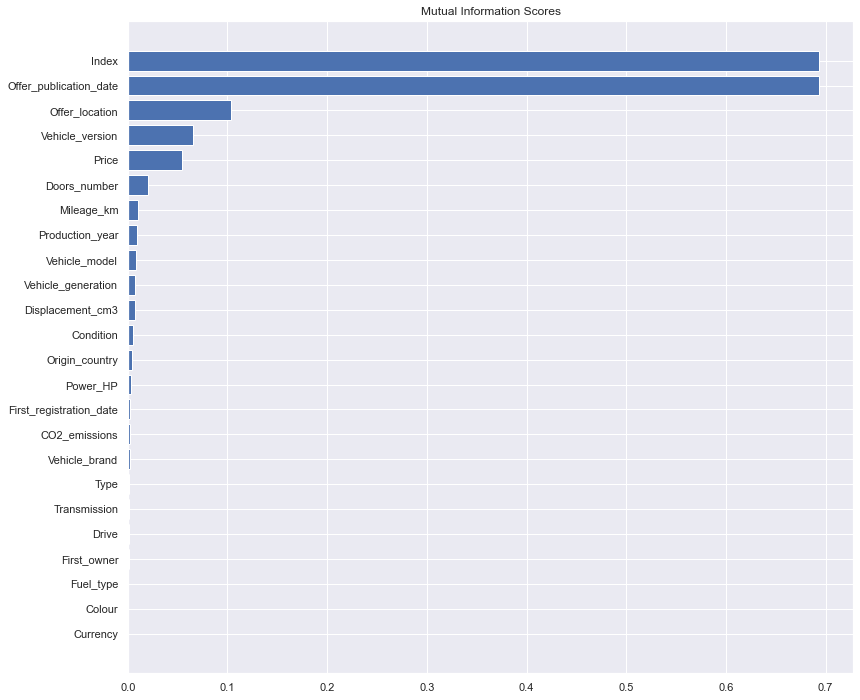

In [65]:
# Offer_publication_date
X_temp = data_mutated_nan_to_placeholder.copy()
X_temp_missing_or_not = data_mutated_non_nan_to_placeholder.copy()
y_temp = X_temp_missing_or_not.pop('Offer_publication_date')
mi_scores = make_mi_scores(X_temp, y_temp)
plot_mi_scores(mi_scores)

In [66]:
data['First_registration_date'].fillna(value=0, inplace=True)
data['Offer_publication_date'].fillna(value=0, inplace=True)

For the next few columns we'll look at their missing data percentage and act accordingly. For columns that have a significant percentage we will need to find a more mature way of dealing with their missing values. But for columns with a low percentage, the central tendencies will suffice.

In [67]:
# Origin_country
(data['Origin_country'].isna().sum() / data.shape[0]) * 100

43.20224287579691

This one's gonna be easy. We'll need to take the brand of the cars and their origin countries and just impute when necessary.

In [68]:
brands_with_countries = dict()


def brands_countries_info(row):
    brand = row['Vehicle_brand']
    country = row['Origin_country']
    if (brand not in brands_with_countries) and (not type(country) == float):
        brands_with_countries[brand] = country
    return row


_ = data.apply(brands_countries_info, axis=1)

In [69]:
brands_with_countries

{'Abarth': 'Germany',
 'Acura': 'Germany',
 'Aixam': 'France',
 'Alfa Romeo': 'Germany',
 'Alpine': 'Italy',
 'Aston Martin': 'Czech Republic',
 'Audi': 'Germany',
 'Austin': 'Great Britain',
 'Baic': 'Germany',
 'Bentley': 'Great Britain',
 'BMW': 'Poland',
 'Buick': 'United States',
 'Cadillac': 'Austria',
 'Casalini': 'France',
 'Chatenet': 'France',
 'Chevrolet': 'Poland',
 'Chrysler': 'United States',
 'Citroën': 'Denmark',
 'Cupra': 'Poland',
 'Dacia': 'Poland',
 'Daewoo': 'Poland',
 'Daihatsu': 'Germany',
 'DFSK': 'Germany',
 'Dodge': 'United States',
 'DS Automobiles': 'Poland',
 'FAW': 'Germany',
 'Ferrari': 'United States',
 'Fiat': 'Poland',
 'Ford': 'Germany',
 'Gaz': 'Germany',
 'GMC': 'United States',
 'Honda': 'Poland',
 'Hummer': 'United States',
 'Hyundai': 'Poland',
 'Infiniti': 'Poland',
 'Isuzu': 'Poland',
 'Iveco': 'Poland',
 'Jaguar': 'Poland',
 'Jeep': 'Poland',
 'Kia': 'Poland',
 'Lada': 'Austria',
 'Lamborghini': 'Poland',
 'Lancia': 'Poland',
 'Land Rover': 'P

In [70]:
def brands_countries_imputer(row):
    country = row['Origin_country']
    brand = row['Vehicle_brand']
    if type(country) == float:
        try:
            row['Origin_country'] = brands_with_countries[brand]
        except KeyError as e:
            pass
    return row


data = data.apply(brands_countries_imputer, axis=1)

In [71]:
data['Origin_country'].isna().sum()

30

In [72]:
# we can just drop the few missing records from here
data = data[data['Origin_country'].notna()]
data['Origin_country'].isna().sum()

0

For the next few columns we'll want to impute them using some sort of ML algorithm.

In [73]:
# Vehicle_version
(data['Vehicle_version'].isna().sum() / data.shape[0]) * 100

33.70175826075266

In [74]:
# Vehicle_generation
(data['Vehicle_generation'].isna().sum() / data.shape[0]) * 100

29.007941461728297

In [76]:
# Drive
(data['Drive'].isna().sum() / data.shape[0]) * 100

7.228938801770744

In [77]:
# Doors_number
(data['Doors_number'].isna().sum() / data.shape[0]) * 100

0.7139633367583087

In [78]:
# Transmission
(data['Transmission'].isna().sum() / data.shape[0]) * 100

0.22998549987036307

In [79]:
# CO2_emissions
(data['CO2_emissions'].isna().sum() / data.shape[0]) * 100

54.844579736308894

We have to decide which features we want for our predictive model of our missing values. Of course we'll use the columns with the missing values themselves but we should also consider other columns.

In [80]:
to_be_used_in_predicting_na = ['Vehicle_model', 'Vehicle_generation', 'Vehicle_brand', 'Vehicle_version',
                               'Drive', 'Doors_number', 'Transmission', 'CO2_emissions']

Now that we have some features which we'll use to predict our missing values we need to first encode some of our categorical data

In [81]:
from sklearn.preprocessing import OrdinalEncoder

# we could have used a OneHotEncoder for our purposes which technically would be better here, as we don't have a  certain order in our categorical features and the Ordinal Encoder might lead to some bad predictions but we can  always do  that  later  when we need it in production
data_for_predicting_missing_values = data.copy(deep=True)

In [82]:
enc = OrdinalEncoder()
enc.fit(data_for_predicting_missing_values[to_be_used_in_predicting_na])
data_encoded = enc.transform(data_for_predicting_missing_values[to_be_used_in_predicting_na])

In [83]:
data_encoded

array([[121.,  nan,   0., ...,   2.,   1.,  nan],
       [764.,  nan,   0., ...,   1.,   1.,  nan],
       [111.,  nan,   0., ...,   2.,   0.,  nan],
       ...,
       [764.,  nan,  95., ...,   2.,   1.,  nan],
       [764.,  nan,  95., ...,   1.,   1.,  nan],
       [764.,  nan,  95., ...,   2.,   1.,  nan]])

In [84]:
enc.categories_

[array(['1.3', '1.5', '1.6', ..., 'ix55', 'up!', 'xA'], dtype=object),
 array(['114', '60.0', '8J (2006-2013)', '8L (1996-2003)',
        '8N (1998-2006)', '8P (2003-2012)', '8R (2008-2016)', '8S (2014-)',
        '8T (2007-2016)', '8V (2012-)', '8Y (2020 - )', '9',
        '930 (1983-1990)', '964 (1989-1994)', '991 (2011-2018)',
        '992 (2019-)', '993 (1993-1997)', '996 (1997-2004)',
        '997 (2005-2011)', 'A (1982-1993)', 'A (1988-1995)',
        'A (1992-1998)', 'A (1999-2005)', 'A (2000-2007)', 'A (2008-2017)',
        'A1 (1980-1984)', 'A2 (1984-1992)', 'A5 (2005-2010)', 'A6 (2010-)',
        'B (1993-2000)', 'B (1994-1999)', 'B (1994-2000)', 'B (1995-2002)',
        'B (1998-2004)', 'B (2005-2014)', 'B (2008-2014)', 'B (2017-)',
        'B FL (1999-2003)', 'B1 (1973-1981)', 'B12/N13 (1986-1991)',
        'B13/N14 (1990-1995)', 'B2 (1978-1986)', 'B2 (1981-1987)',
        'B3 (1986-1991)', 'B3 (1988-1993)', 'B4 (1991-1995)',
        'B4 (1993-1997)', 'B5 (1995-2001)', 'B5 

In [85]:
data_encoded = pd.DataFrame(data_encoded, columns=to_be_used_in_predicting_na)

In [86]:
data_encoded.head()

Vehicle_model  Vehicle_generation  Vehicle_brand  Vehicle_version  Drive  \
0          121.0                 NaN            0.0              NaN    3.0   
1          764.0                 NaN            0.0              NaN    3.0   
2          111.0                 NaN            0.0              NaN    NaN   
3          111.0                 NaN            0.0              NaN    3.0   
4          121.0                 NaN            0.0              NaN    NaN   

   Doors_number  Transmission  CO2_emissions  
0           2.0           1.0            NaN  
1           1.0           1.0            NaN  
2           2.0           0.0            NaN  
3           2.0           1.0          118.0  
4           2.0           1.0            NaN

In [87]:
data_for_predicting_missing_values['Vehicle_model'] = data_encoded['Vehicle_model']
data_for_predicting_missing_values['Vehicle_generation'] = data_encoded['Vehicle_generation']
data_for_predicting_missing_values['Vehicle_brand'] = data_encoded['Vehicle_brand']
data_for_predicting_missing_values['Vehicle_version'] = data_encoded['Vehicle_version']
data_for_predicting_missing_values['Drive'] = data_encoded['Drive']
data_for_predicting_missing_values['Doors_number'] = data_encoded['Doors_number']
data_for_predicting_missing_values['Transmission'] = data_encoded['Transmission']
data_for_predicting_missing_values['CO2_emissions'] = data_encoded['CO2_emissions']

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_it = IterativeImputer()

In [89]:
imputed_data = pd.DataFrame(impute_it.fit_transform(data_for_predicting_missing_values[to_be_used_in_predicting_na]),
                            columns=to_be_used_in_predicting_na)

In [90]:
imputed_data.head()

Vehicle_model  Vehicle_generation  Vehicle_brand  Vehicle_version  \
0          121.0          197.400300            0.0      8603.475224   
1          764.0          170.288980            0.0      9651.144271   
2          111.0          203.310898            0.0     12210.149902   
3          111.0          196.213742            0.0      7884.038548   
4          121.0          200.980265            0.0      8441.256936   

      Drive  Doors_number  Transmission  CO2_emissions  
0  3.000000           2.0           1.0     138.381524  
1  3.000000           1.0           1.0     153.459030  
2  2.777338           2.0           0.0     153.440250  
3  3.000000           2.0           1.0     118.000000  
4  3.297673           2.0           1.0     135.003644

In [91]:
def decode_results(row):
    row['Vehicle_model'] = enc.categories_[0][int(row['Vehicle_model'])]
    row['Vehicle_generation'] = enc.categories_[1][int(row['Vehicle_generation'])]
    row['Vehicle_brand'] = enc.categories_[2][int(row['Vehicle_brand'])]
    row['Drive'] = enc.categories_[4][int(row['Drive'])]
    row['Doors_number'] = enc.categories_[5][int(row['Doors_number'])]
    row['Transmission'] = enc.categories_[6][int(row['Transmission'])]
    row['CO2_emissions'] = enc.categories_[7][int(row['CO2_emissions'])]
    return row


imputed_data = imputed_data.apply(decode_results, axis=1)

In [92]:
data['Vehicle_model'] = imputed_data['Vehicle_model']
data['Vehicle_generation'] = imputed_data['Vehicle_generation']
data['Vehicle_brand'] = imputed_data['Vehicle_brand']
data['Drive'] = imputed_data['Drive']
data['Doors_number'] = imputed_data['Doors_number']
data['Transmission'] = imputed_data['Transmission']
data['CO2_emissions'] = imputed_data['CO2_emissions']

In [93]:
data.drop(['Vehicle_version'], axis=1, inplace=True)

In [94]:
data.isna().sum()[(data.isna().sum() != 0)].sort_values(ascending=False)

Displacement_cm3      1965
Mileage_km             983
Power_HP               643
Vehicle_brand           28
Vehicle_model           28
Vehicle_generation      28
CO2_emissions           28
Drive                   28
Transmission            28
Doors_number            28
dtype: int64

For the remaining columns you can clearly see that their missing values don't even make up 1% of the entire dataset. This is why it's very appropriate to fill the missing values here with the mean, mode or median. But we can't just fill all with the mean.
We can use the mean value to replace the missing values in case the data distribution is symmetric. If that's not the case we should act otherwise. Plots such as box plots and distribution plots come very handily in deciding which techniques to use. When the data is skewed, it is good to consider using the median or mode

In [95]:
# Displacement_cm3
(data['Displacement_cm3'].isna().sum() / data.shape[0]) * 100

0.9434686998857275

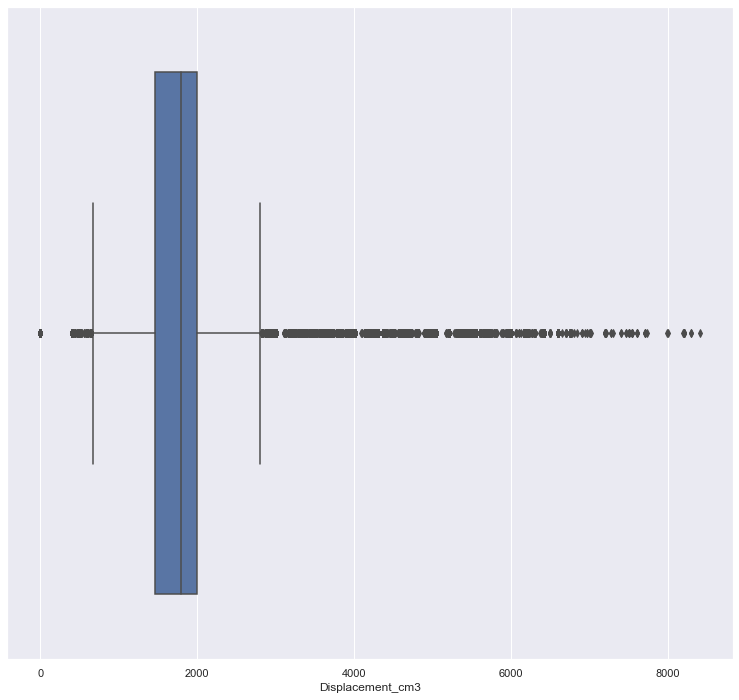

In [96]:
sns.boxplot(x=data_mutated_nan_to_placeholder['Displacement_cm3']);

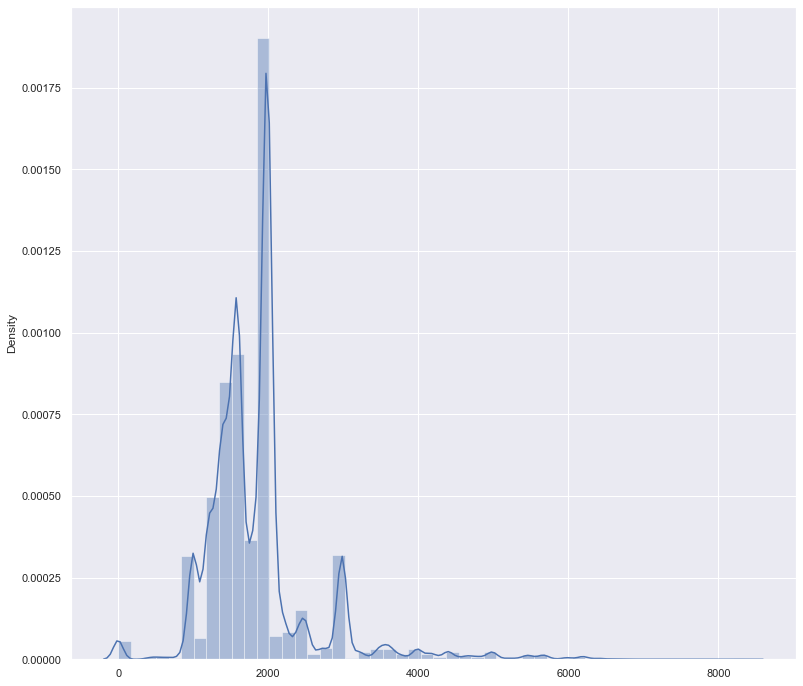

In [97]:
sns.distplot(x=data_mutated_nan_to_placeholder['Displacement_cm3']);

In [98]:
data['Displacement_cm3'].fillna(value=data['Displacement_cm3'].mode()[0], inplace=True)

As we can see here the data is very much skewed so it's a good idea to use the mode here to fill the values.

In [99]:
# Mileage_km
(data['Mileage_km'].isna().sum() / data.shape[0]) * 100

0.47197441831433595

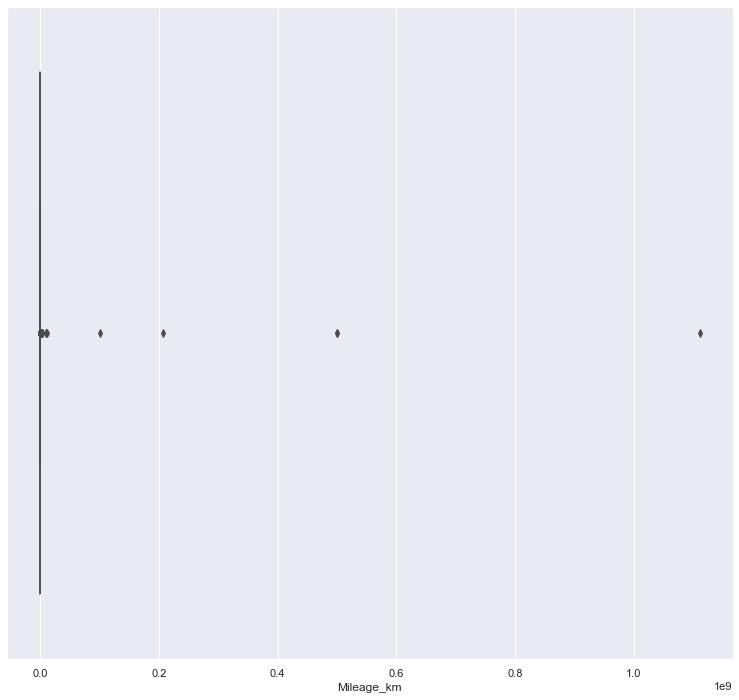

In [100]:
sns.boxplot(x=data_mutated_nan_to_placeholder['Mileage_km']);

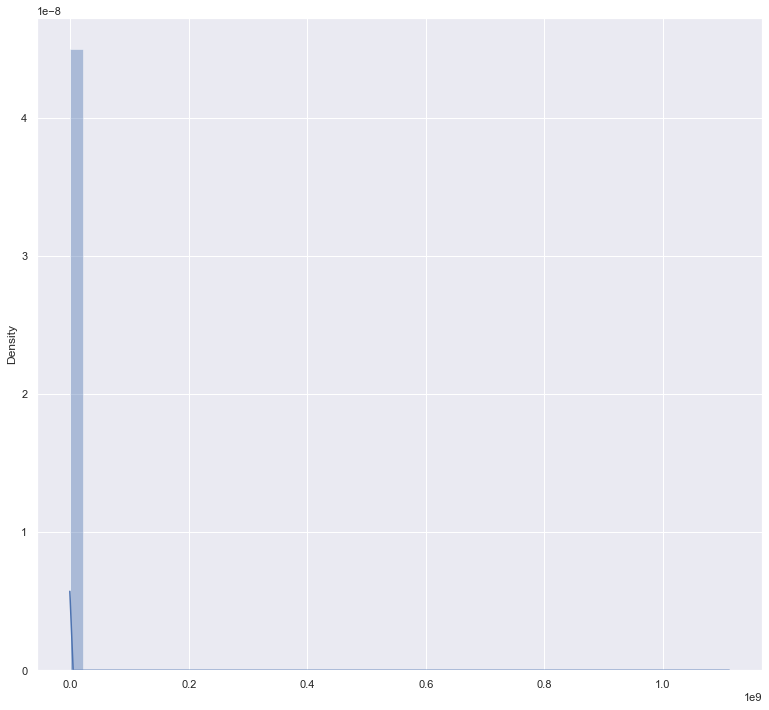

In [101]:
sns.distplot(x=data_mutated_nan_to_placeholder['Mileage_km']);

In [102]:
data['Mileage_km'].fillna(value=data['Mileage_km'].mode()[0], inplace=True)

In [103]:
# Power_HP
(data['Power_HP'].isna().sum() / data.shape[0]) * 100

0.30872792571324315

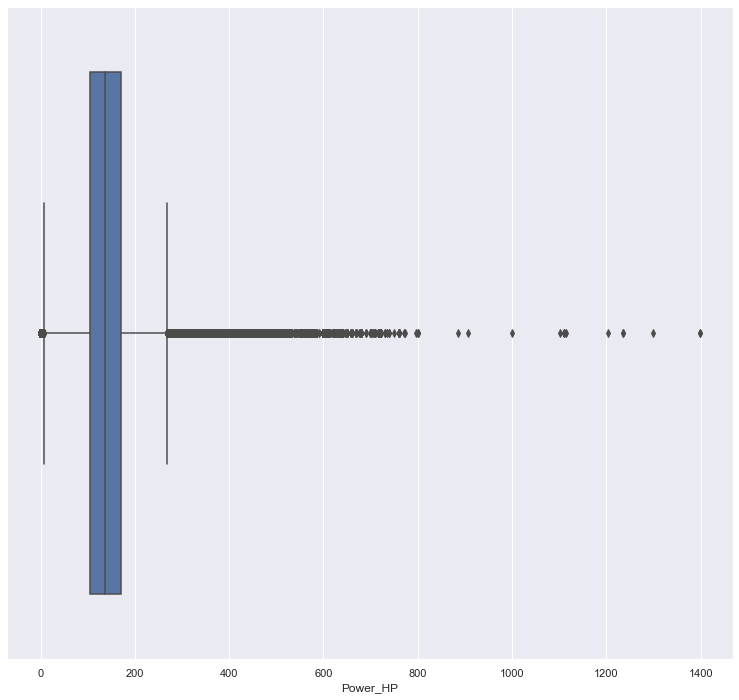

In [105]:
sns.boxplot(x=data_mutated_nan_to_placeholder['Power_HP']);

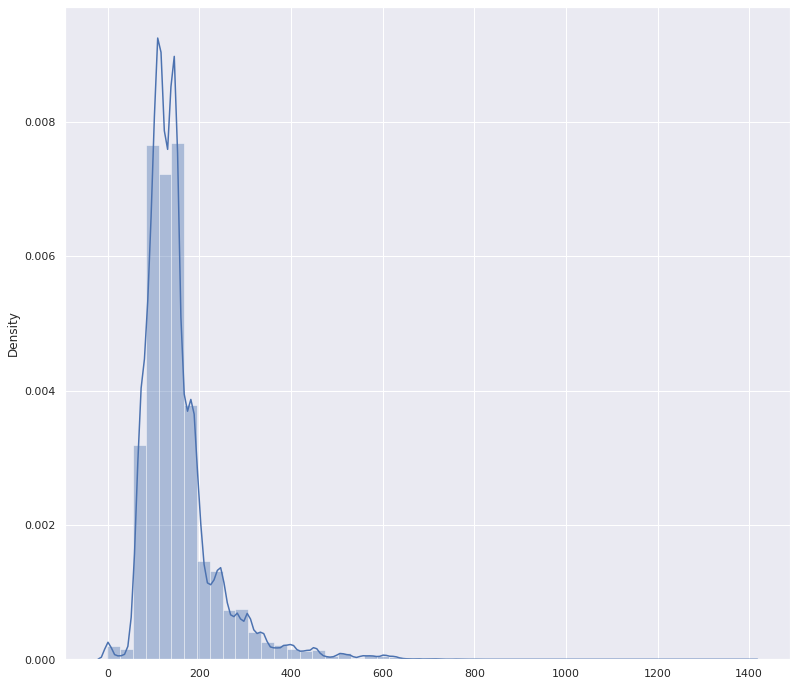

In [99]:
sns.distplot(x=data_mutated_nan_to_placeholder['Power_HP']);

In [106]:
data['Power_HP'].fillna(value=data['Power_HP'].mode()[0], inplace=True)

In [107]:
data.dropna(inplace=True)

Now we can look and see our dataset has no missing values anymore and we only had to loose about 100 rows..

In [108]:
data.isna().sum()

Index                      0
Price                      0
Currency                   0
Condition                  0
Vehicle_brand              0
Vehicle_model              0
Vehicle_generation         0
Production_year            0
Mileage_km                 0
Power_HP                   0
Displacement_cm3           0
Fuel_type                  0
CO2_emissions              0
Drive                      0
Transmission               0
Type                       0
Doors_number               0
Colour                     0
Origin_country             0
First_owner                0
First_registration_date    0
Offer_publication_date     0
Offer_location             0
dtype: int64

[](https://media4.giphy.com/media/G1vplGMypxBcp7kx32/giphy.gif)

Now that we've dealt with our main dataset we can see how we'll deal with the missing values on our features dataset

In [109]:
car_features.head()

Index  ABS  Electric front windows  Drivers airbag  Power steering  \
0      0  NaN                     NaN             NaN             NaN   
1      1  NaN                     NaN             NaN             NaN   
2      2  NaN                     NaN             NaN             NaN   
3      3  1.0                     1.0             1.0             1.0   
4      4  1.0                     1.0             1.0             1.0   

   ASR (traction control)  Rear view camera  Heated side mirrors   CD  \
0                     NaN               NaN                  NaN  NaN   
1                     NaN               NaN                  NaN  NaN   
2                     NaN               NaN                  NaN  NaN   
3                     1.0               NaN                  NaN  1.0   
4                     1.0               NaN                  1.0  NaN   

   Electrically adjustable mirrors  ...  CD changer  Auxiliary heating  \
0                              NaN  ...         NaN                NaN   
1                              NaN  ...         NaN                NaN   
2                              NaN  ...         NaN                NaN   
3                              1.0  ...         NaN                NaN   
4                              1.0  ...         NaN                NaN   

   Heated rear seats  Four-zone air conditioning  TV tuner  Roof rails  \
0                NaN                         NaN       NaN         NaN   
1                NaN                         NaN       NaN         NaN   
2                NaN                         NaN       NaN         NaN   
3                NaN                         NaN       NaN         NaN   
4                NaN                         NaN       NaN         NaN   

   Active cruise control  Hook  Lane assistant  HUD(head-up display)  
0                    NaN   NaN             NaN                   NaN  
1                    NaN   NaN             NaN                   NaN  
2                    NaN   NaN             NaN                   NaN  
3                    NaN   NaN             NaN                   NaN  
4                    NaN   NaN             NaN                   NaN  

[5 rows x 71 columns]

Right now it contains a loooot of missing values, and rightfully so. We sort of did a manual  "One-Hot-Encoding" on it before

In [110]:
car_features.isna().sum()

Index                          0
ABS                        21922
Electric front windows     26808
Drivers airbag             27922
Power steering             27819
                           ...  
Roof rails                148068
Active cruise control     183472
Hook                      178777
Lane assistant            171537
HUD(head-up display)      199630
Length: 71, dtype: int64

But as said before, missing values here do not necessarily mean that the car does not posses those features. It can mean that the post did not include them. That in mind we still want a way to analyze this data at a later stage. So maybe it's a good idea to add a placeholder like "Not Mentioned" so we don't find ourselves in situations where we can't analyze our data because of missing values

In [111]:
car_features.fillna(value="Not Mentioned", inplace=True)

In [112]:
car_features.head()

Index            ABS Electric front windows Drivers airbag Power steering  \
0      0  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
1      1  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
2      2  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
3      3            1.0                    1.0            1.0            1.0   
4      4            1.0                    1.0            1.0            1.0   

  ASR (traction control) Rear view camera Heated side mirrors             CD  \
0          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
1          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
2          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
3                    1.0    Not Mentioned       Not Mentioned            1.0   
4                    1.0    Not Mentioned                 1.0  Not Mentioned   

  Electrically adjustable mirrors  ...     CD changer Auxiliary heating  \
0                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
1                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
2                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
3                             1.0  ...  Not Mentioned     Not Mentioned   
4                             1.0  ...  Not Mentioned     Not Mentioned   

  Heated rear seats Four-zone air conditioning       TV tuner     Roof rails  \
0     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
1     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
2     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
3     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
4     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   

  Active cruise control           Hook Lane assistant HUD(head-up display)  
0         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
1         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
2         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
3         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
4         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  

[5 rows x 71 columns]

In [113]:
car_features.isna().sum().sum()

0

a quick look at both datasets for features...

In [114]:
car_features.head()

Index            ABS Electric front windows Drivers airbag Power steering  \
0      0  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
1      1  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
2      2  Not Mentioned          Not Mentioned  Not Mentioned  Not Mentioned   
3      3            1.0                    1.0            1.0            1.0   
4      4            1.0                    1.0            1.0            1.0   

  ASR (traction control) Rear view camera Heated side mirrors             CD  \
0          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
1          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
2          Not Mentioned    Not Mentioned       Not Mentioned  Not Mentioned   
3                    1.0    Not Mentioned       Not Mentioned            1.0   
4                    1.0    Not Mentioned                 1.0  Not Mentioned   

  Electrically adjustable mirrors  ...     CD changer Auxiliary heating  \
0                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
1                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
2                   Not Mentioned  ...  Not Mentioned     Not Mentioned   
3                             1.0  ...  Not Mentioned     Not Mentioned   
4                             1.0  ...  Not Mentioned     Not Mentioned   

  Heated rear seats Four-zone air conditioning       TV tuner     Roof rails  \
0     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
1     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
2     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
3     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   
4     Not Mentioned              Not Mentioned  Not Mentioned  Not Mentioned   

  Active cruise control           Hook Lane assistant HUD(head-up display)  
0         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
1         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
2         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
3         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
4         Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  

[5 rows x 71 columns]

In [115]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_generation  Production_year  Mileage_km  Power_HP  ...  \
0      I (1996-2010)             2021         1.0     145.0  ...   
1      I (1989-1992)             1974     59000.0      75.0  ...   
2      I (1997-2006)             2018     52000.0     180.0  ...   
3      I (1996-2008)             2012     29000.0     160.0  ...   
4      I (1997-2001)             2021       600.0     165.0  ...   

             Drive Transmission        Type Doors_number  Colour  \
0     Front wheels       Manual  small_cars          3.0    gray   
1     Front wheels       Manual       coupe          2.0  silver   
2  4x4 (permanent)    Automatic  small_cars          3.0  silver   
3     Front wheels       Manual  small_cars          3.0    gray   
4     Front wheels       Manual  small_cars          3.0    blue   

  Origin_country  First_owner First_registration_date Offer_publication_date  \
0        Germany      Missing                     0.0                 2021.0   
1        Germany      Missing                     0.0                 2021.0   
2        Germany      Missing                     0.0                 2021.0   
3        Germany      Missing                     0.0                    0.0   
4        Germany      Missing                     0.0                    0.0   

                                      Offer_location  
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...  
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...  
2                   Warszawa, Mazowieckie, Białołęka  
3                                  Jaworzno, Śląskie  
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...  

[5 rows x 23 columns]

In [116]:
data = pd.merge(left=data, right=car_features, left_on='Index', right_on='Index')

In [117]:
data.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_generation  Production_year  Mileage_km  Power_HP  ...  \
0      I (1996-2010)             2021         1.0     145.0  ...   
1      I (1989-1992)             1974     59000.0      75.0  ...   
2      I (1997-2006)             2018     52000.0     180.0  ...   
3      I (1996-2008)             2012     29000.0     160.0  ...   
4      I (1997-2001)             2021       600.0     165.0  ...   

      CD changer Auxiliary heating  Heated rear seats  \
0  Not Mentioned     Not Mentioned      Not Mentioned   
1  Not Mentioned     Not Mentioned      Not Mentioned   
2  Not Mentioned     Not Mentioned      Not Mentioned   
3  Not Mentioned     Not Mentioned      Not Mentioned   
4  Not Mentioned     Not Mentioned      Not Mentioned   

  Four-zone air conditioning       TV tuner     Roof rails  \
0              Not Mentioned  Not Mentioned  Not Mentioned   
1              Not Mentioned  Not Mentioned  Not Mentioned   
2              Not Mentioned  Not Mentioned  Not Mentioned   
3              Not Mentioned  Not Mentioned  Not Mentioned   
4              Not Mentioned  Not Mentioned  Not Mentioned   

   Active cruise control           Hook Lane assistant HUD(head-up display)  
0          Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
1          Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
2          Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
3          Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  
4          Not Mentioned  Not Mentioned  Not Mentioned        Not Mentioned  

[5 rows x 93 columns]

# data visualization

We need some kind of strategy here.
We will divide this section into two parts. 1- We will look at each feature individually first and try to find some insights from them alone and 2- then look at combinations of features together. 

## Indiviudal

 For each important feature we will do a couple of things:
- Look for outliers and try to understand why they exist
- Try to find valuable insights with visualizations and Data Analysis

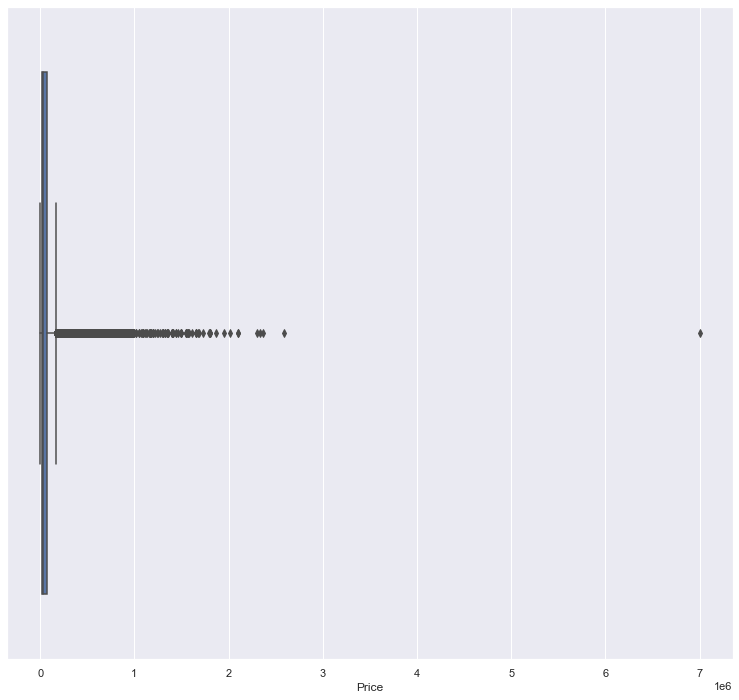

In [118]:
# Price
sns.boxplot(x=data['Price']);

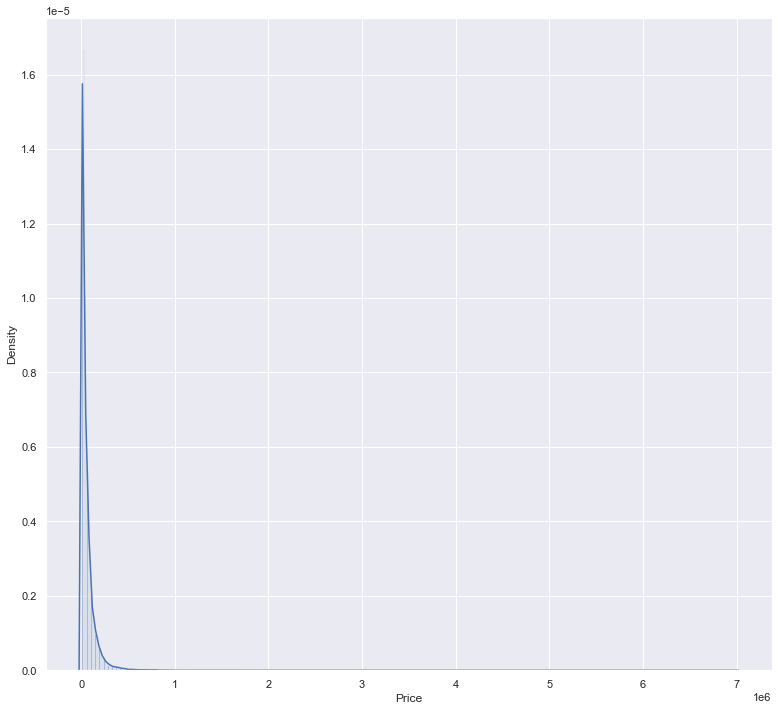

In [119]:
sns.distplot(data['Price'], bins=500);

In [120]:
f'Most values range from 0 to {1 * 1e6}'

'Most values range from 0 to 1000000.0'

Given this data distribution as well as our box-plot, we can easily see that we do have some outliers. Especially on the box-plot we've got a lot of data out of the norm (Exceeding the maximum). Normally we would need to handle  them but we're not building a ML model here. We're looking for insights.
Using the box-plot we can see that some data points are out of the norm. But that doesn't make them wrong. They range until 3e6, which is still acceptable for cars.
But what seems to really be out of the ordinary is that data at 7e6.
We'll need to look at that data to understand it.

In [121]:
data['Price'].sort_values(ascending=False).head()

32194     6999000
142348    2583000
153411    2370000
153412    2330000
87982     2300000
Name: Price, dtype: int64

As we can see we have a really large number at the top. Even for very luxurious cars this would be considered weird.

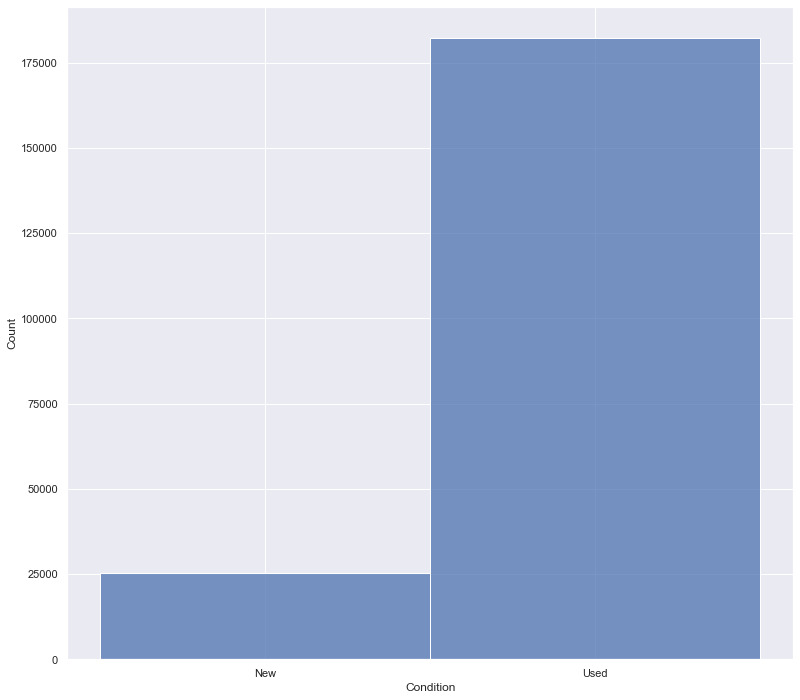

In [122]:
# Condition
sns.histplot(data=data, x='Condition');

We can clearly see that there are alot more used cars on the site, than there are new ones. Other than that there's not more we can do.

In [123]:
# Vehicle_brand
data['Vehicle_brand'].value_counts()[28:45]

Jaguar            985
Lexus             977
Subaru            840
Chrysler          697
Dodge             683
Saab              459
Smart             300
Infiniti          287
Lancia            256
SsangYong         195
Maserati          188
Cadillac          162
Cupra             158
Daihatsu          146
Aixam             141
Daewoo            132
DS Automobiles    126
Name: Vehicle_brand, dtype: int64

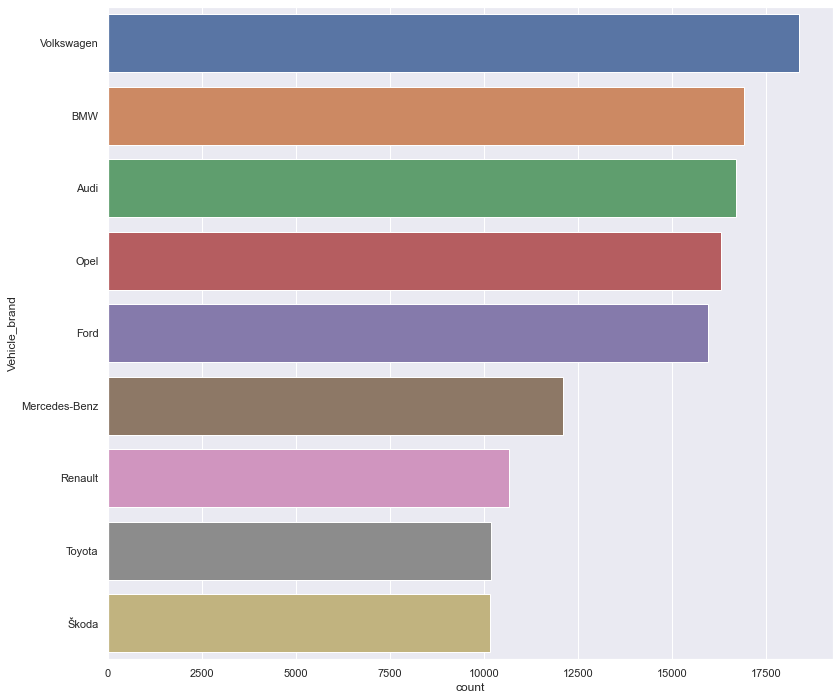

In [124]:
sns.countplot(y=data['Vehicle_brand'][(data['Vehicle_brand'].isin(data['Vehicle_brand'].value_counts()[:9].index))],
              order=data['Vehicle_brand'].value_counts()[:9].index);

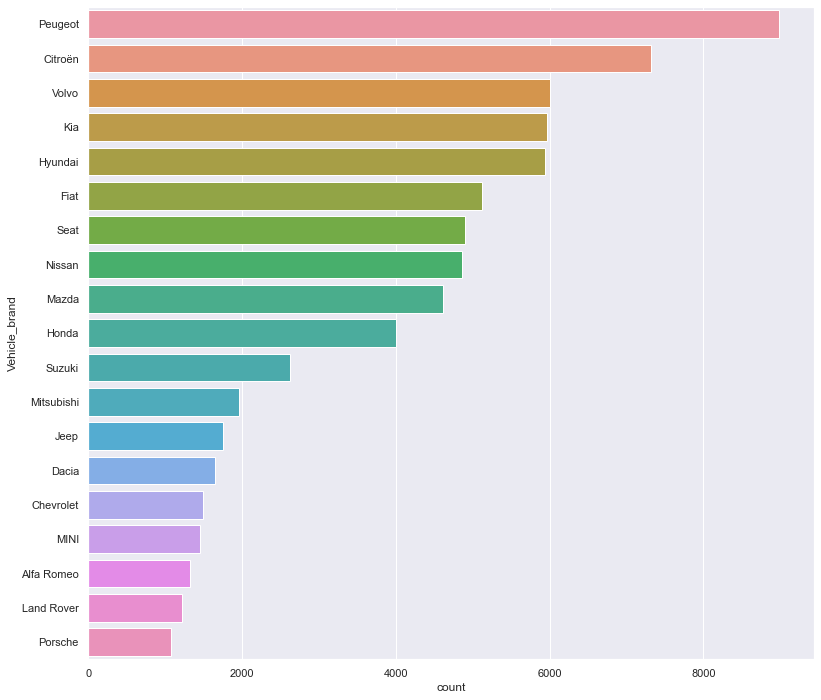

In [127]:
sns.countplot(y=data['Vehicle_brand'][(data['Vehicle_brand'].isin(data['Vehicle_brand'].value_counts()[9:28].index))],
              order=data['Vehicle_brand'].value_counts()[9:28].index);

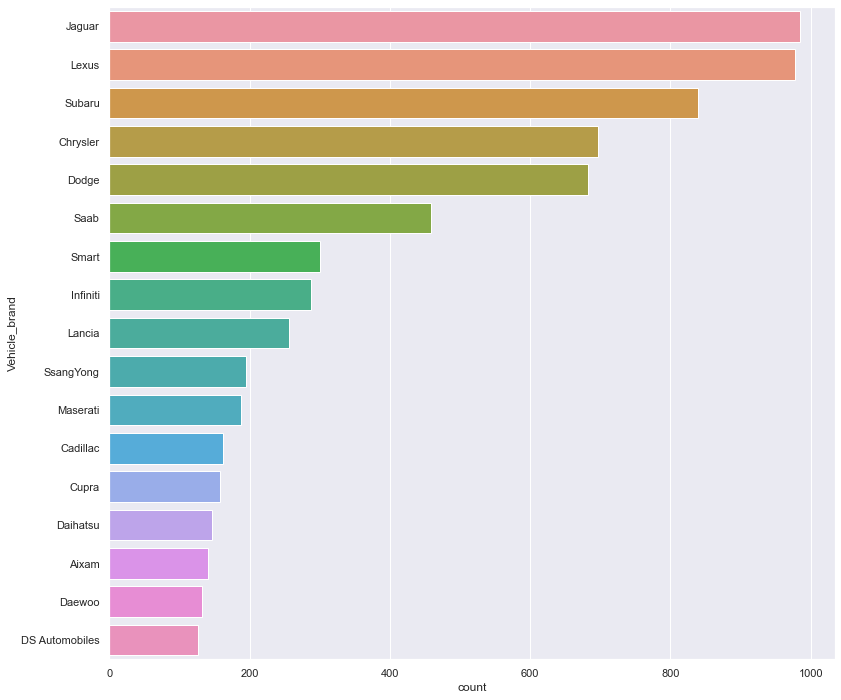

In [126]:
sns.countplot(y=data['Vehicle_brand'][(data['Vehicle_brand'].isin(data['Vehicle_brand'].value_counts()[28:45].index))],
              order=data['Vehicle_brand'].value_counts()[28:45].index);

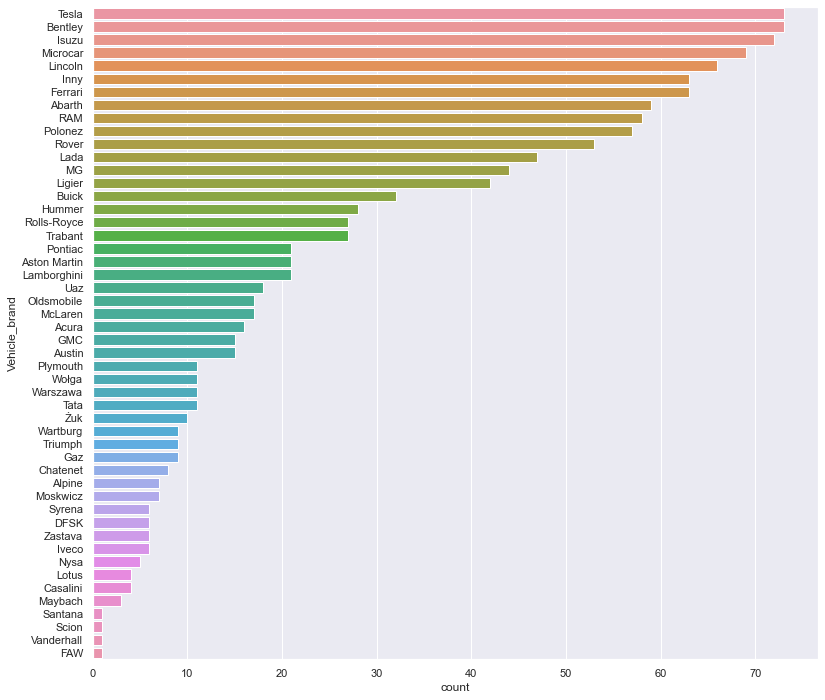

In [128]:
sns.countplot(y=data['Vehicle_brand'][(data['Vehicle_brand'].isin(data['Vehicle_brand'].value_counts()[45:].index))],
              order=data['Vehicle_brand'].value_counts()[45:].index);

As we can see we've got a lot of different cars in poland. We've seen that some come up quite often but others almost not at all.

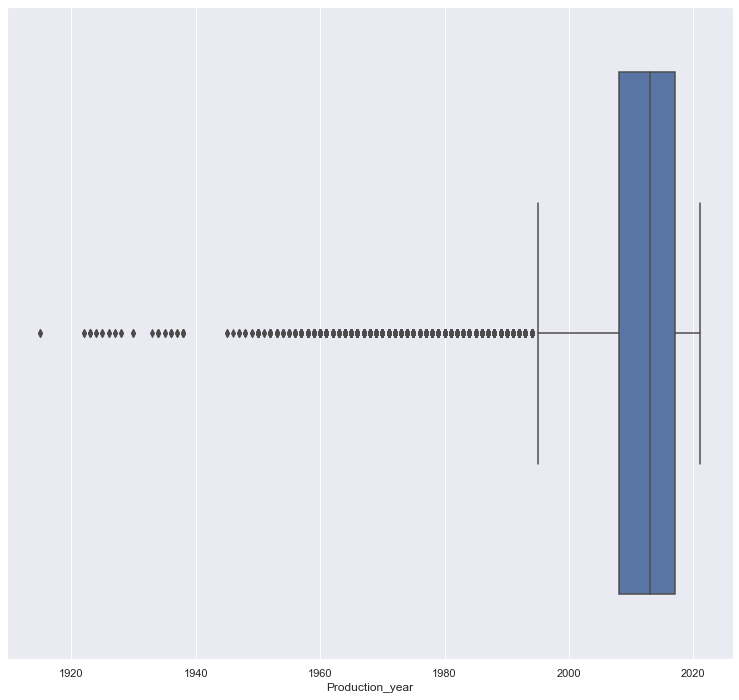

In [129]:
# Production_year
sns.boxplot(x=data['Production_year']);

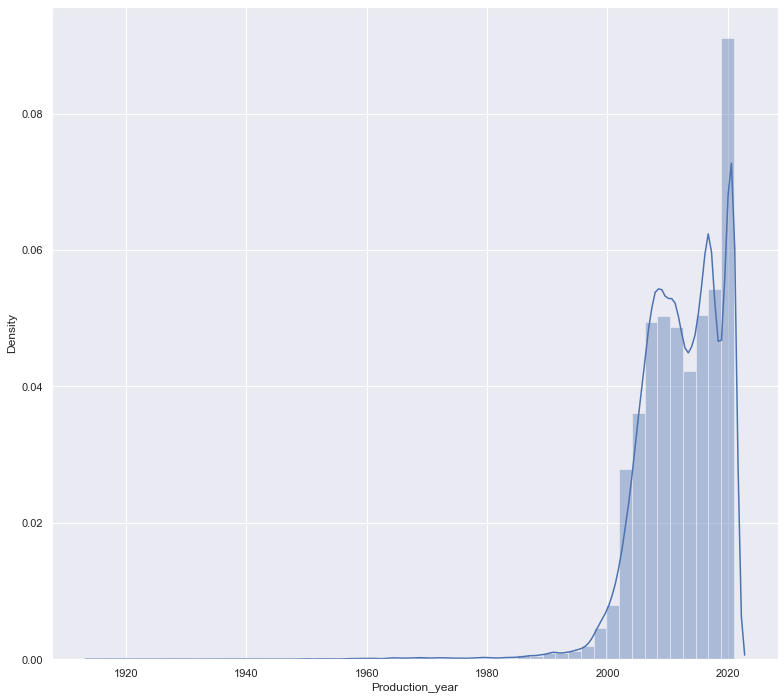

In [130]:
sns.distplot(data['Production_year']);

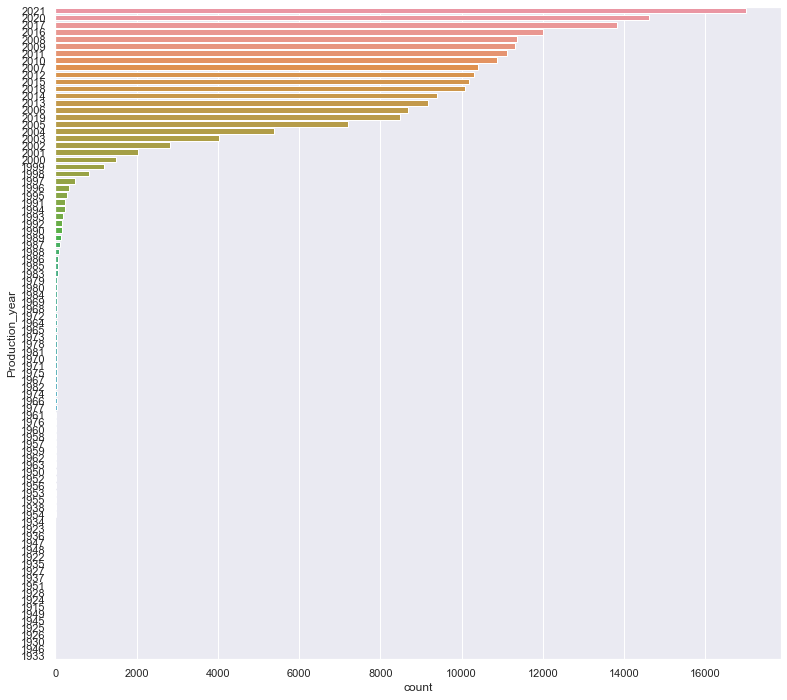

In [131]:
sns.countplot(y=data['Production_year'][(data['Production_year'].isin(data['Production_year'].value_counts().index))],
              order=data['Production_year'].value_counts().index);

As per those visualizations we can clearly see the amount of outliers for the production year. I highly doubt that there are any correct sales for cars that came out before the year 1980. From the boxplot alone we can already clearly see our ranges. But using the distribution plots as well as the count plot we can clearly say that if we were to build an ML model we'd need to get rid of all the outliers (cars came out before 1980).

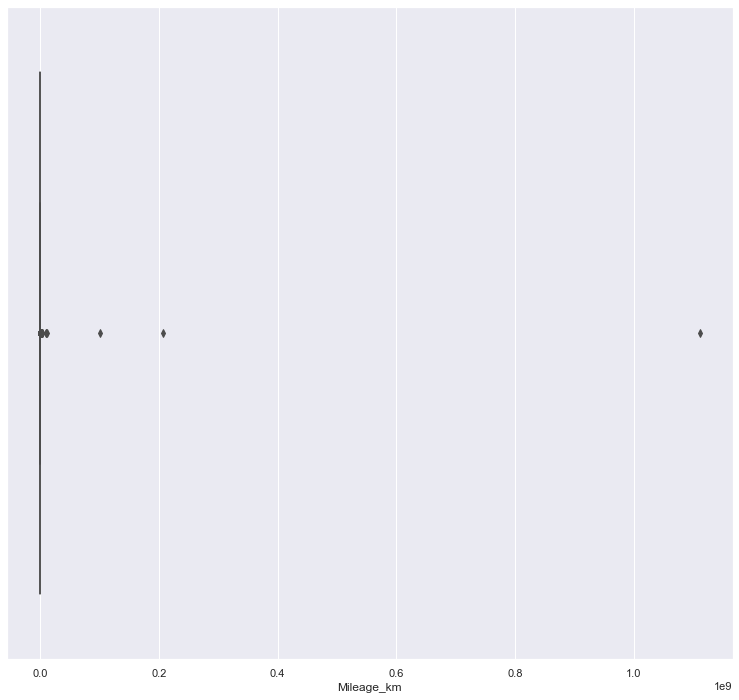

In [132]:
# Mileage_km
sns.boxplot(x=data['Mileage_km']);

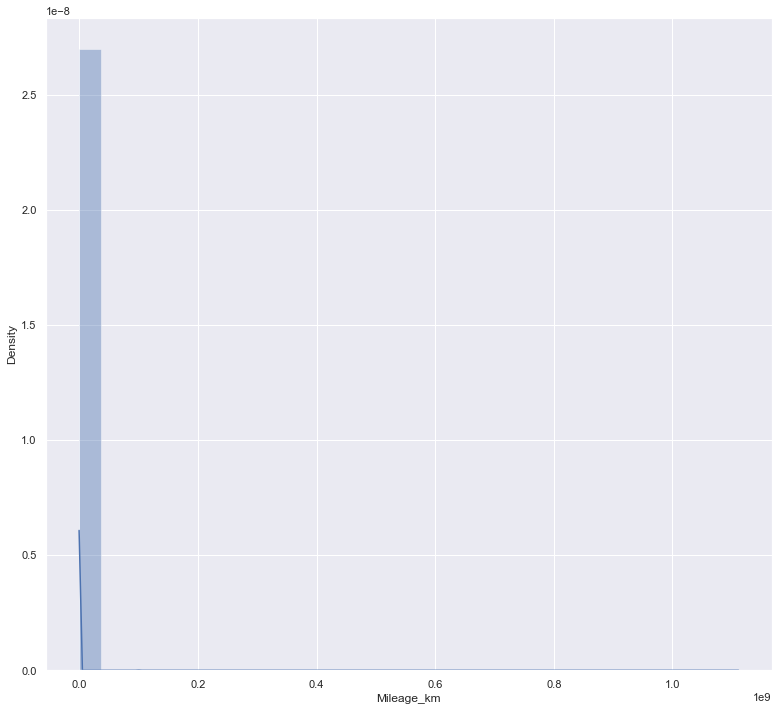

In [133]:
sns.distplot(data['Mileage_km'], bins=30);

Even with binning we can see that most values lie within a certain range, with the exception of a few outliers.
We'll need to look at it in another way.

In [134]:
data['Mileage_km'].describe()

count    2.076040e+05
mean     1.447829e+05
std      2.491963e+06
min      1.000000e+00
25%      5.126525e+04
50%      1.440000e+05
75%      2.057000e+05
max      1.111111e+09
Name: Mileage_km, dtype: float64

It really looks like most of those values lie in the same area...Maybe those are the standard milegas for used cars. We'll find out when we look at this column with respect to another one.

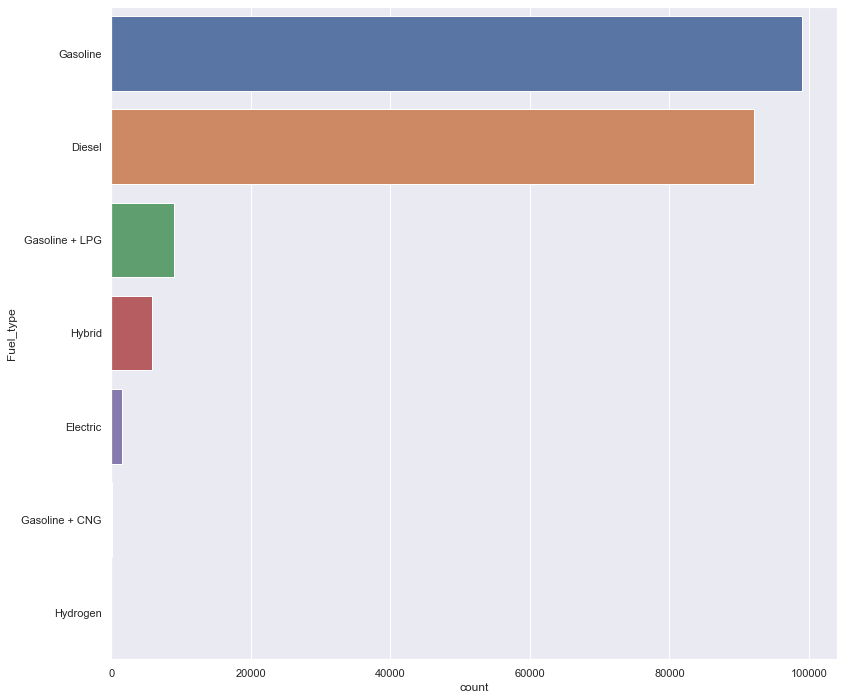

In [135]:
# Fuel_type
sns.countplot(y=data['Fuel_type'], order=data['Fuel_type'].value_counts().index);

We can't really say anything else here, but that Gasoline and Diesel are the most used Fuel types.

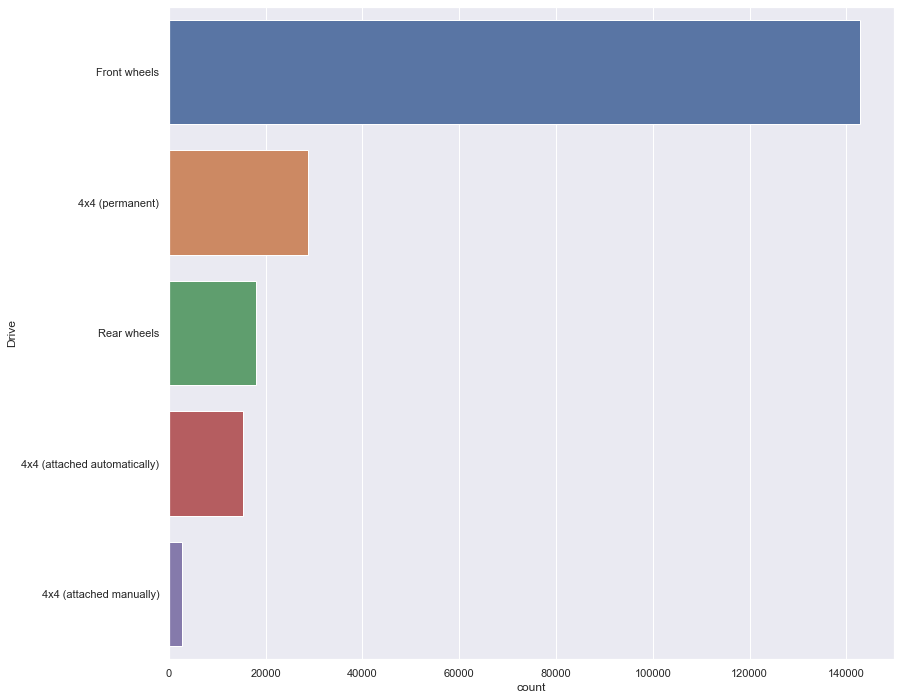

In [136]:
# Drive
sns.countplot(y=data['Drive'], order=data['Drive'].value_counts().index);

The same goes here. It's good to know how much each drive type is used but that's not really a valuable insight.

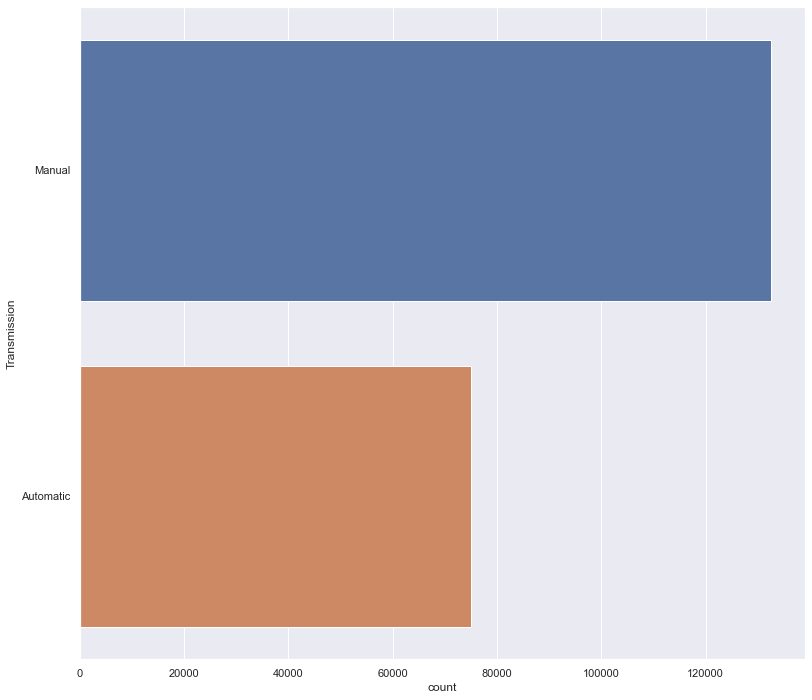

In [137]:
# Transmission
sns.countplot(y=data['Transmission'], order=data['Transmission'].value_counts().index);

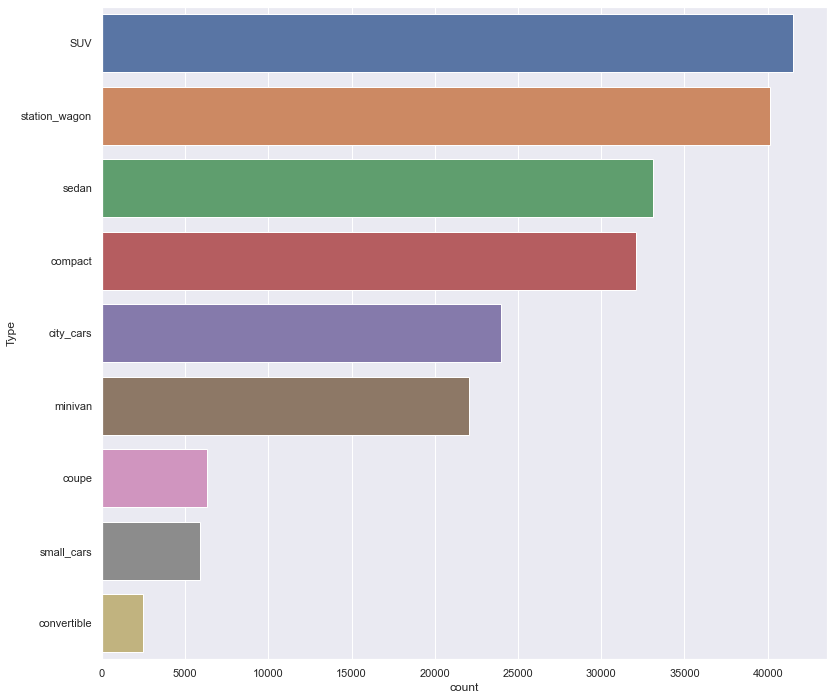

In [138]:
# Type
sns.countplot(y=data['Type'], order=data['Type'].value_counts().index);

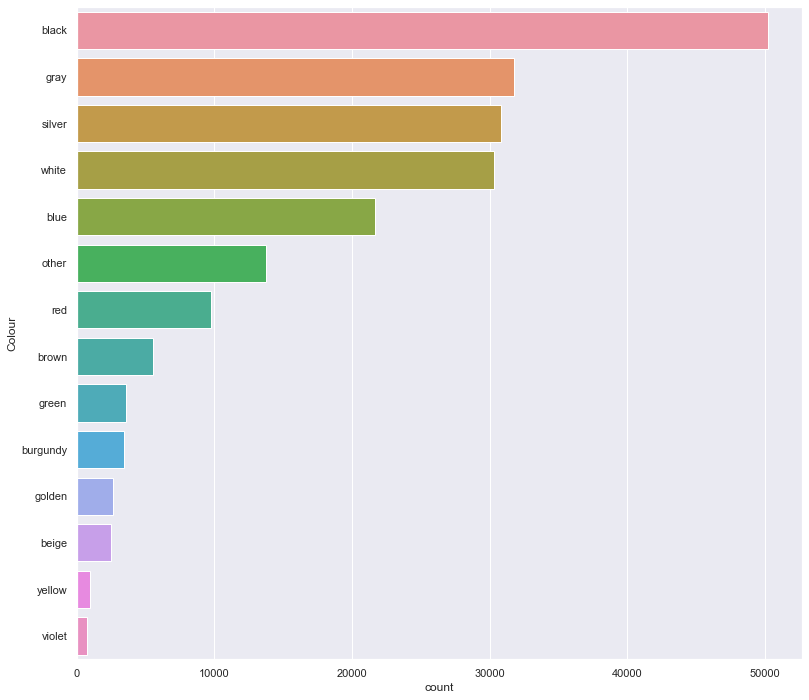

In [139]:
# Colour
sns.countplot(y=data['Colour'], order=data['Colour'].value_counts().index);

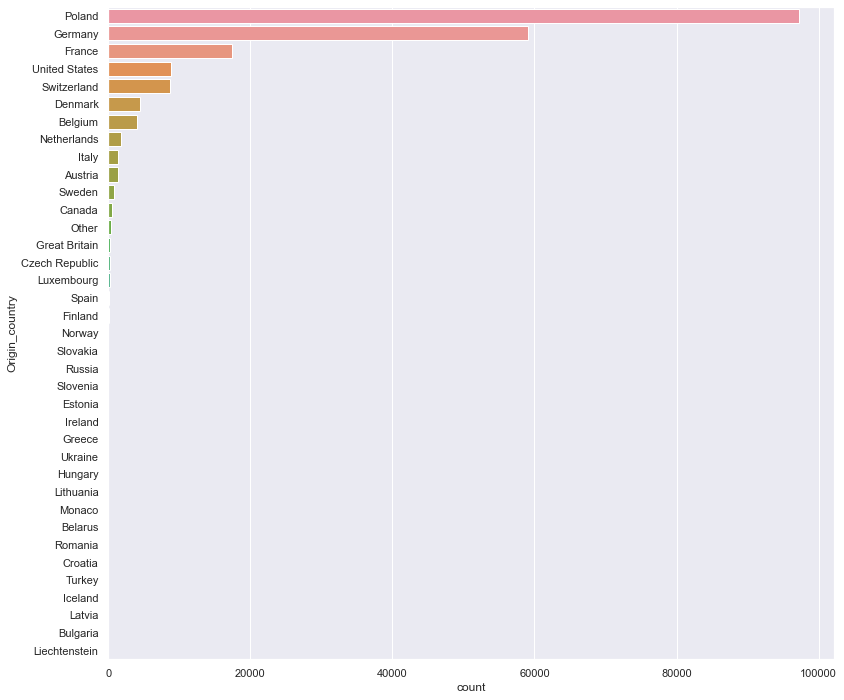

In [140]:
# Origin_country
sns.countplot(y=data['Origin_country'], order=data['Origin_country'].value_counts().index);

### world map

In [141]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="Car Origin Countries")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


In [142]:
countries_with_lat_lon = dict()

for country in data['Origin_country'].unique():
    countries_with_lat_lon[country] = geocode(country)[1]

In [147]:
countries_with_lat_lon

{'Germany': (51.1638175, 10.4478313),
 'Poland': (52.215933, 19.134422),
 'France': (46.603354, 1.8883335),
 'Switzerland': (46.7985624, 8.2319736),
 'United States': (39.7837304, -100.445882),
 'Austria': (47.59397, 14.12456),
 'Canada': (61.0666922, -107.991707),
 'Italy': (42.6384261, 12.674297),
 'Belgium': (50.6402809, 4.6667145),
 'Netherlands': (52.2434979, 5.6343227),
 'Denmark': (55.670249, 10.3333283),
 'Sweden': (59.6749712, 14.5208584),
 'Czech Republic': (49.7439047, 15.3381061),
 'Other': (18.443262150000002, -77.30074843023925),
 'Finland': (63.2467777, 25.9209164),
 'Great Britain': (54.31536155, -1.9180234948012402),
 'Luxembourg': (49.8158683, 6.1296751),
 'Slovenia': (46.1199444, 14.8153333),
 'Belarus': (53.4250605, 27.6971358),
 'Spain': (39.3260685, -4.8379791),
 'Hungary': (47.1817585, 19.5060937),
 'Slovakia': (48.7411522, 19.4528646),
 'Ireland': (52.865196, -7.9794599),
 'Norway': (61.1529386, 8.7876653),
 'Lithuania': (55.3500003, 23.7499997),
 'Estonia': (58

In [148]:
def countries_lat(row):
    row['Origin_country_lat'] = countries_with_lat_lon[row['Origin_country']][0]
    return row


def countries_lon(row):
    row['Origin_country_lon'] = countries_with_lat_lon[row['Origin_country']][1]
    return row


data['Origin_country_lat'] = np.nan
data['Origin_country_lon'] = np.nan
data = data.apply(countries_lat, axis=1)
data = data.apply(countries_lon, axis=1)

In [149]:
import folium
from folium.plugins import HeatMap

In [150]:
m_2 = folium.Map(location=[42.32, -71.0589], tiles='cartodbpositron', zoom_start=3)
HeatMap(data=data[['Origin_country_lat', 'Origin_country_lon']], radius=10).add_to(m_2)

m_2

The first thing we can notice is how those countries are spread out especially in europe. There are some cars bought from the west and some from russia but the main dispersion can be seen in europe, especially in Poland, we can see a lot of Polish cars being sold in poland. This could mean a possible preference of polish people to cars from their home country. Maybe it's cheaper because of how there isn't any customs on imported cars.

## combinational

here we try to ask these questions:
- Ask questions about a feature
- trying out different combinations
- Try to find valuable insights with visualizations and Data Analysis


### - is the price correlated to anything ?


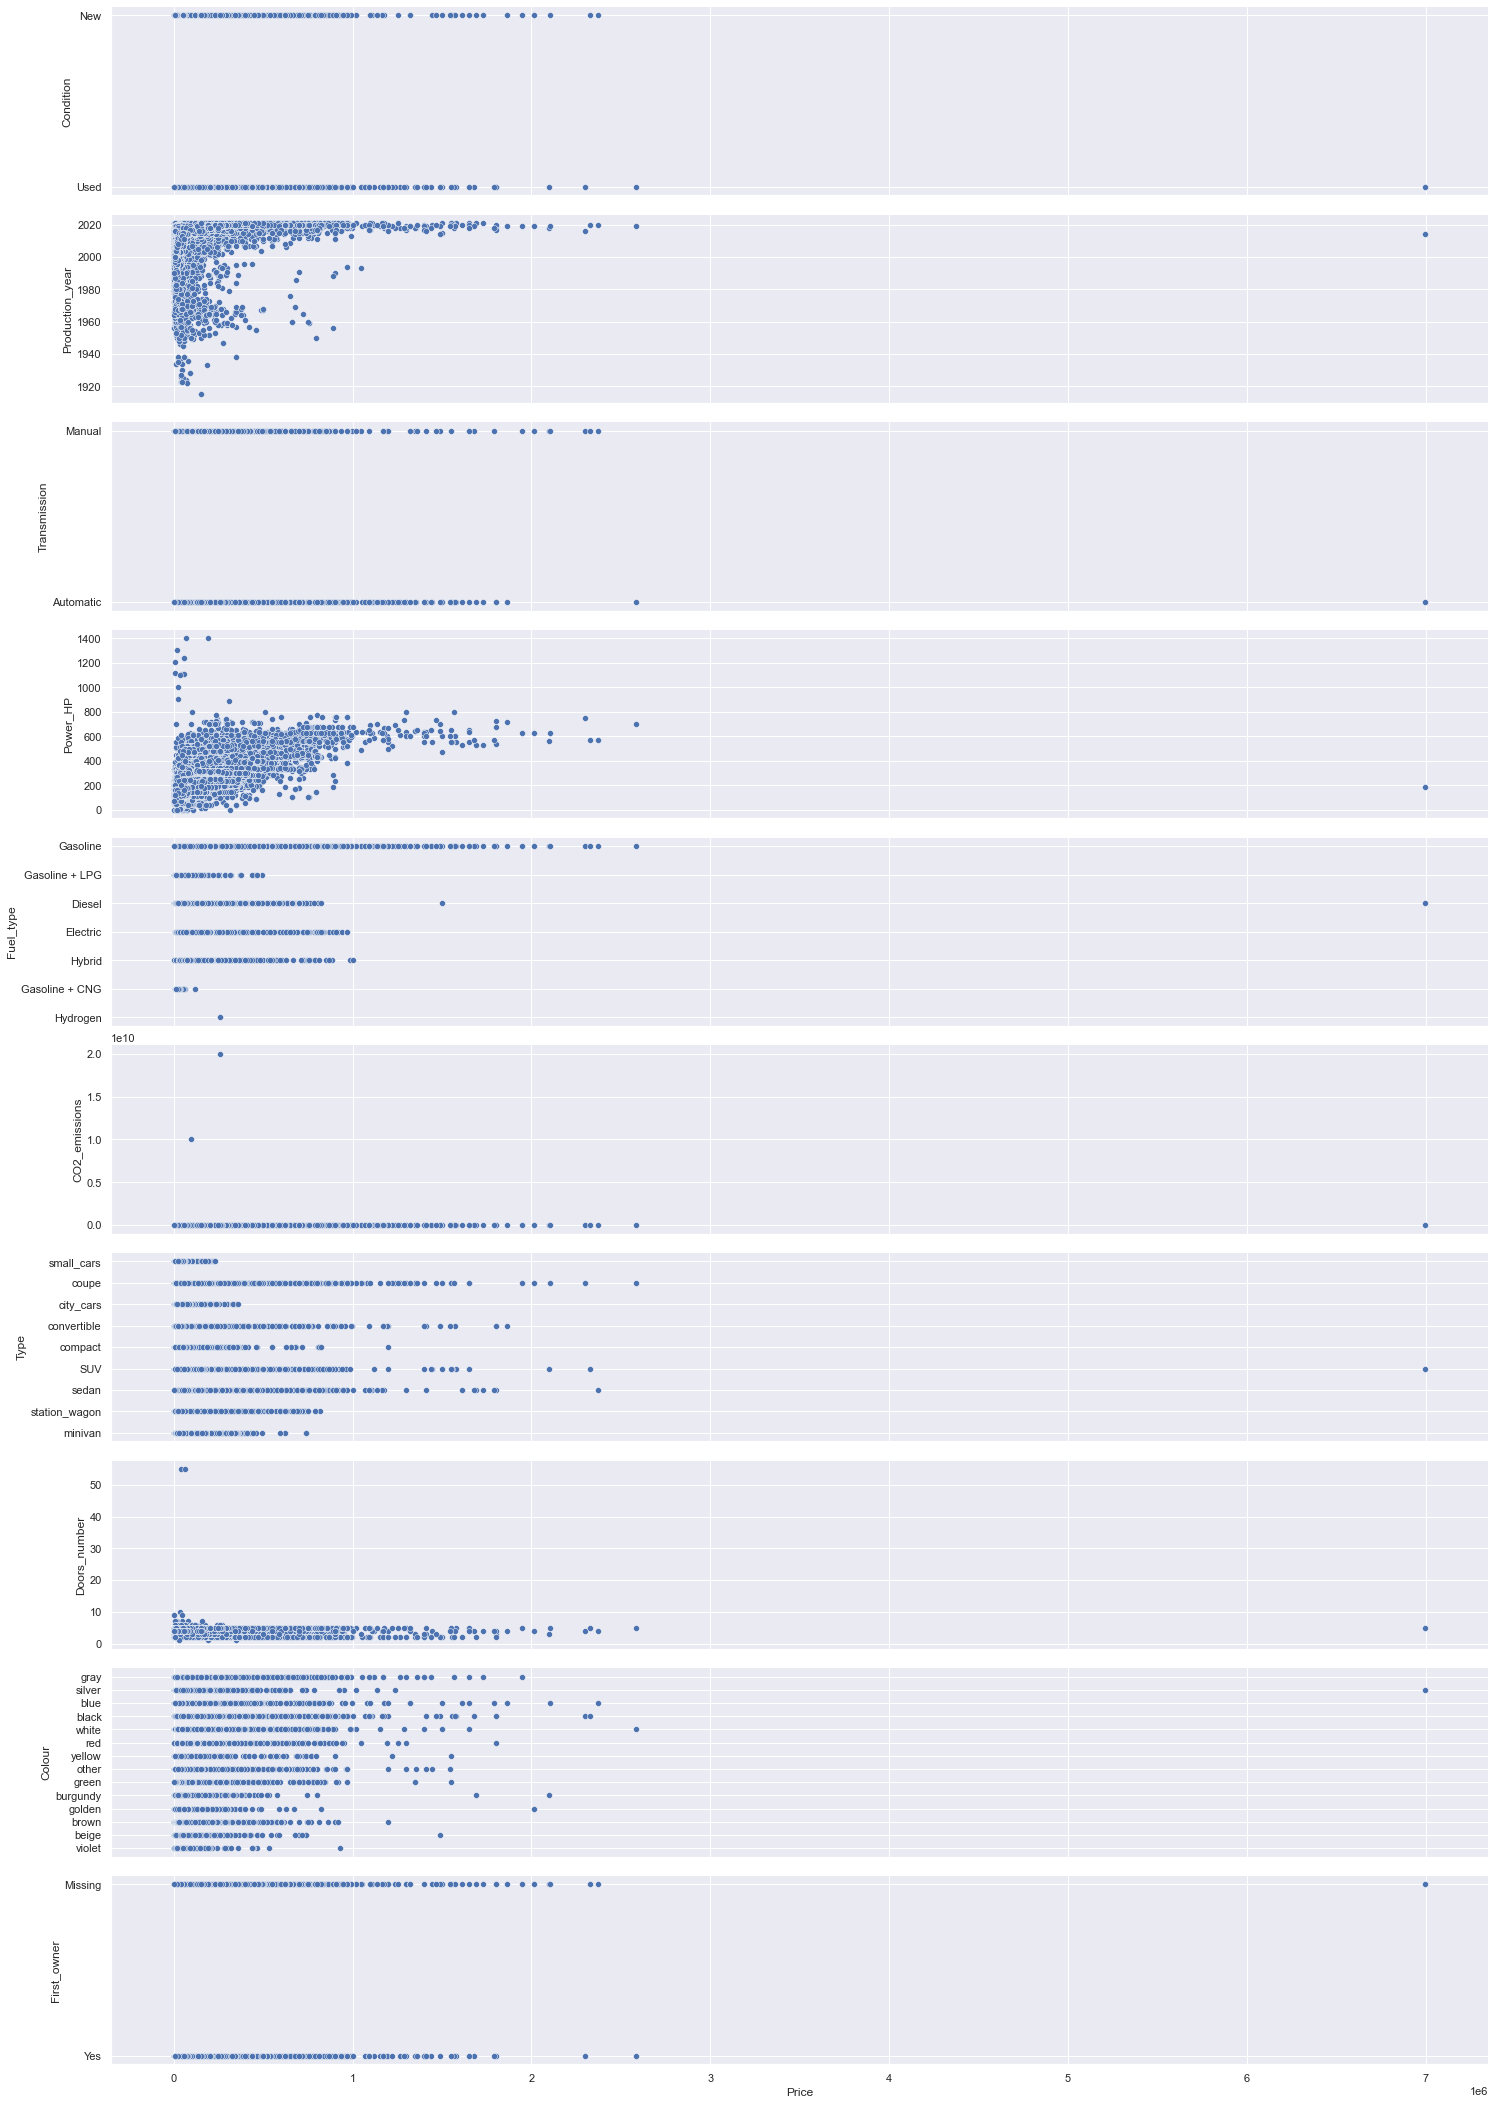

In [151]:
g = sns.PairGrid(data,
                 x_vars='Price',
                 y_vars=['Condition', 'Production_year', 'Transmission', 'Power_HP',
                         'Fuel_type', 'CO2_emissions', 'Type', 'Doors_number',
                         'Colour', 'First_owner'])
g.fig.set_size_inches(30, 30)
g.map(sns.scatterplot);

We can clearly see a trend for the Production year, horse power, Fuel type, door numbers and type so we'll want to look at those in more details.

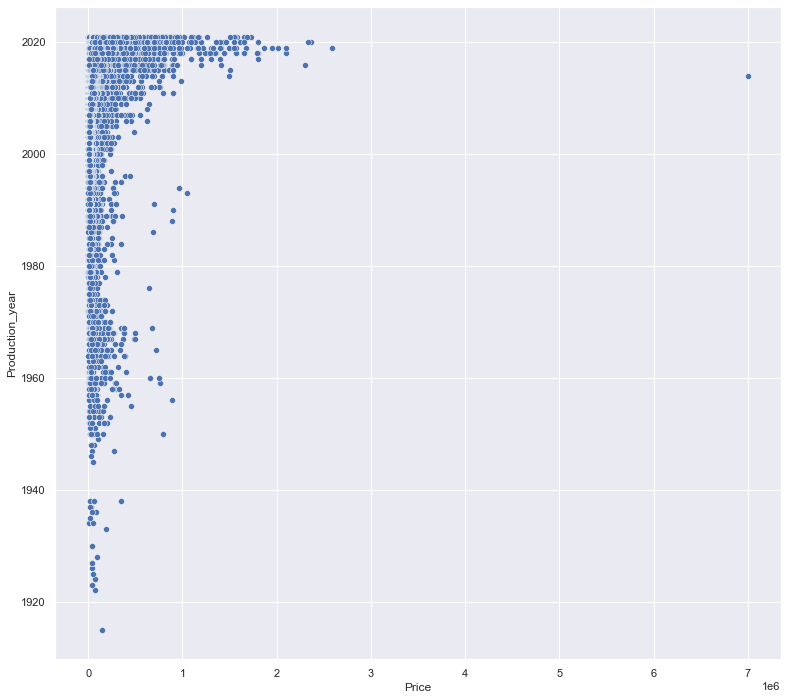

In [152]:
#price and production_year
sns.scatterplot(data=data, x='Price', y='Production_year');

And after dropping that outlier we can have a better look at our data.

In [153]:
data.drop(index=32302, inplace=True)

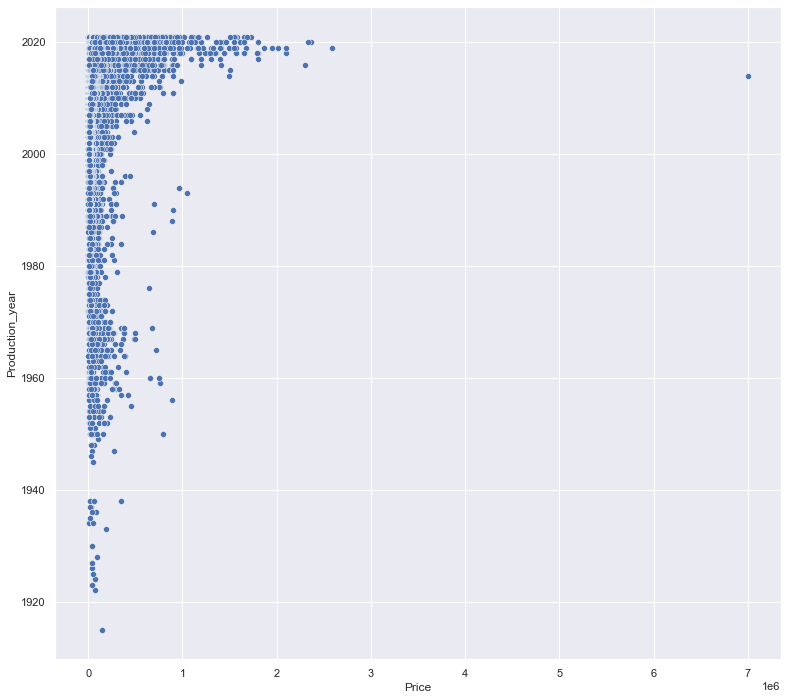

In [154]:
sns.scatterplot(data=data, x='Price', y='Production_year');

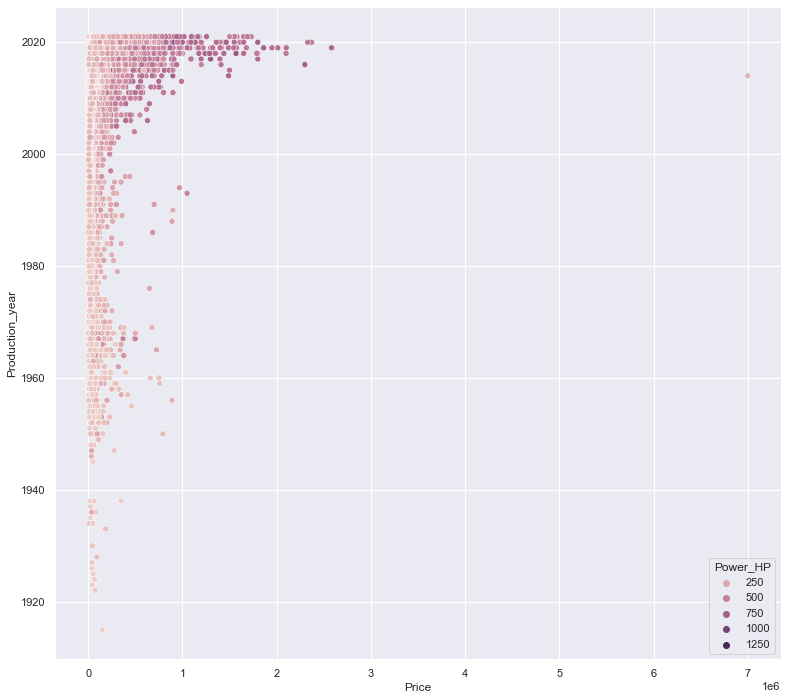

In [155]:
#price, production_year and power_HP
sns.scatterplot(data=data, x='Price', y='Production_year', hue='Power_HP');

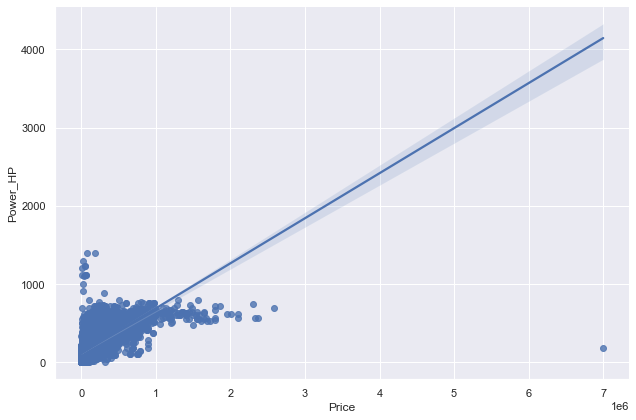

In [156]:
sns.lmplot(data=data, x='Price', y='Power_HP', height=6, aspect=1.5);

So we do actually see an increase in price with the increase of horse power as well as with the latest cars per year.

In [157]:
data['Type'].value_counts().index

Index(['SUV', 'station_wagon', 'sedan', 'compact', 'city_cars', 'minivan',
       'coupe', 'small_cars', 'convertible'],
      dtype='object')

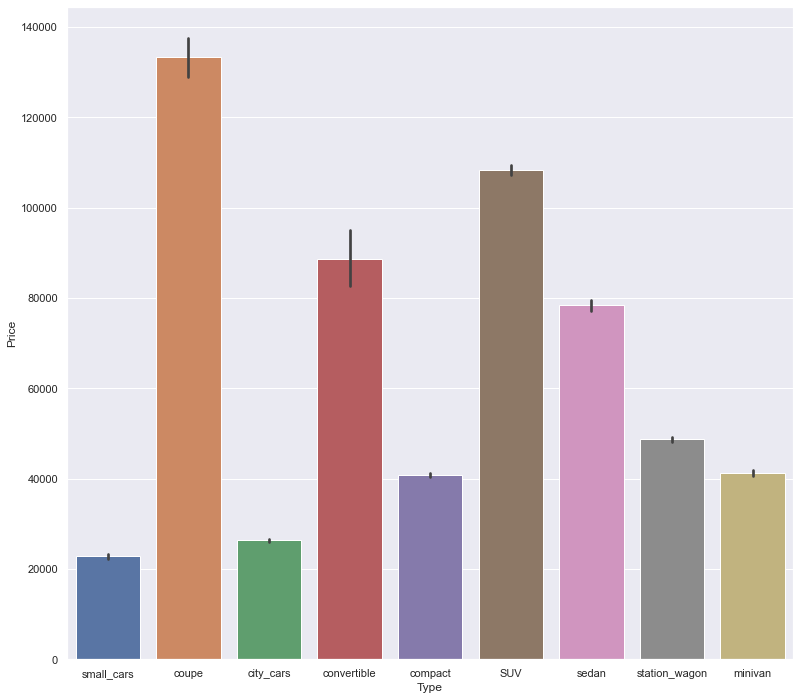

In [158]:
#price and type
sns.barplot(x=data['Type'], y=data['Price']);

here, we can see how each type of car has different proces that can be compared to others.

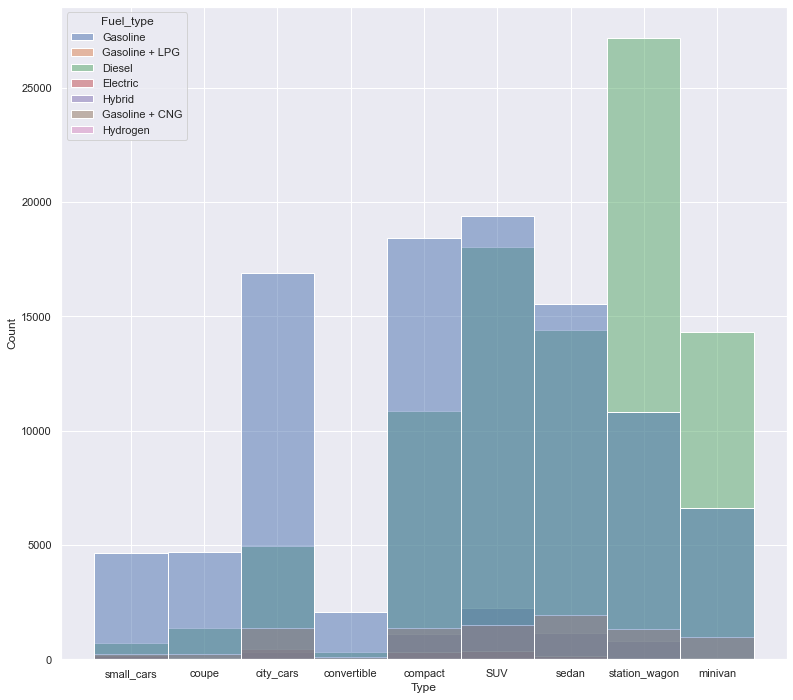

In [159]:
#type and fuel_type
sns.histplot(data=data, x='Type', hue='Fuel_type');

We can notice that the non-work cars (like coupe and city-cars) are usually prone tp use Gasoline more while some of the work-cars like station-wagons usually go for Diesel as it's less expensive.

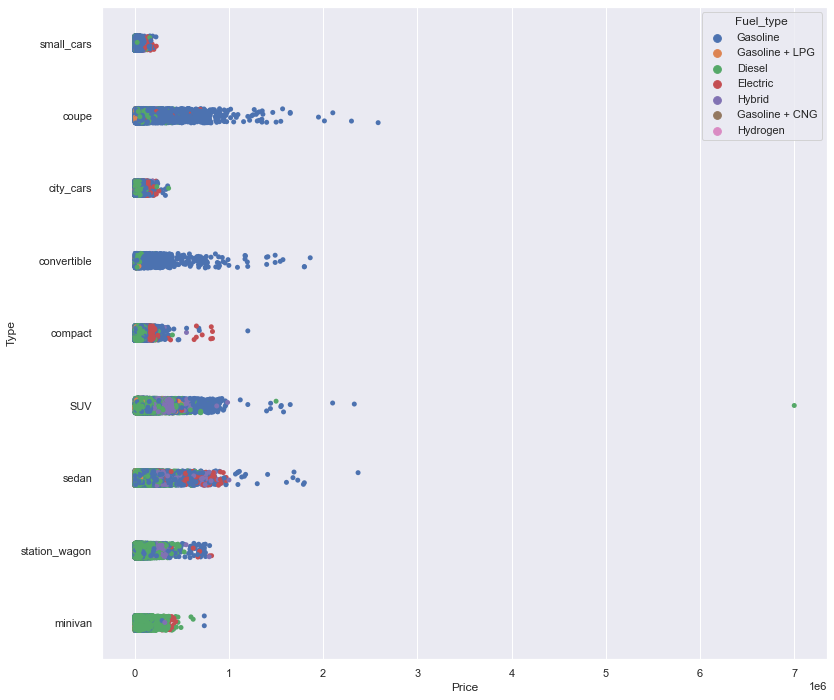

In [160]:
#price, type, fuel_type
sns.stripplot(data=data, x='Price', y='Type', hue='Fuel_type');

here we might gain good insight. First of all we can very clearly see how the coupes are one of the more expensive cars while they also use Gasoline, which is one of the more expensive types of fuel.

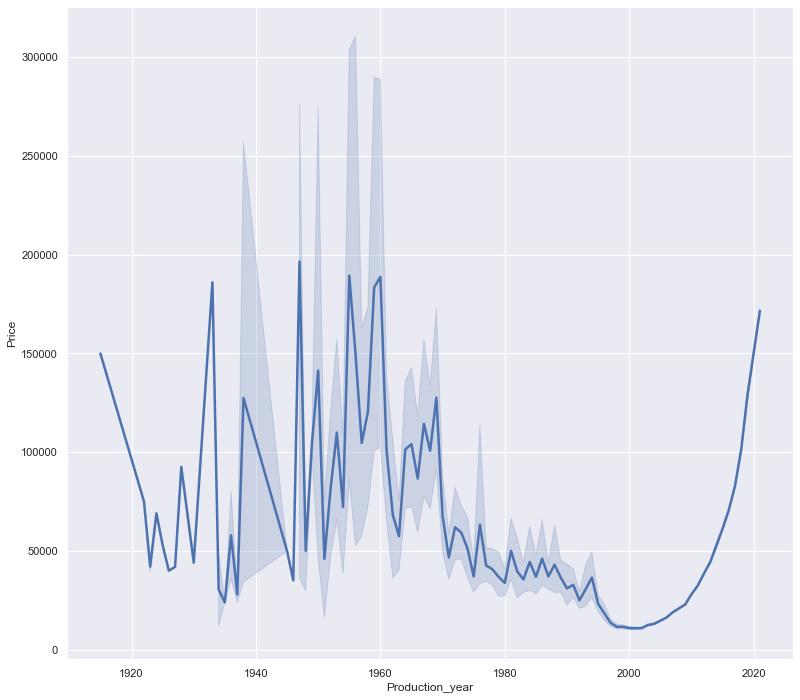

In [161]:
# price and production_year
sns.lineplot(data=data, x='Production_year', y='Price', palette="tab10", linewidth=2.5);

A lot of the data before the year 2000 seems to be unimportant for us. beacause we can clearly observe relation between price and production_year after 2000, something we lack before 2000.

In [162]:
data['Production_year'].describe()

count    207603.000000
mean       2012.118414
std           6.951436
min        1915.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2021.000000
Name: Production_year, dtype: float64

We can clearly see that starting from the 25th quartile we are at the year 2008. Which indicates that most of our values are in that range or greater and those values ranging from 1915 to 1990s are possible outliers.

In [163]:
print('Length of data with production years before year 2000 ==>', len(data['Production_year'][
                                                                           (data['Production_year'] <
                                                                                            2000)]))
data['Production_year'][(data['Production_year'] < 2000)].head()

Length of data with production years before year 2000 ==> 5790


1      1974
113    1999
198    1994
220    1998
310    1997
Name: Production_year, dtype: int64

As you can see only about 6000 values range from befroe 2000, Which means that more than 200,000 values are above or equal to the year 2000.
This shows that all of the years below 2000 are outliers and we can diregard them.

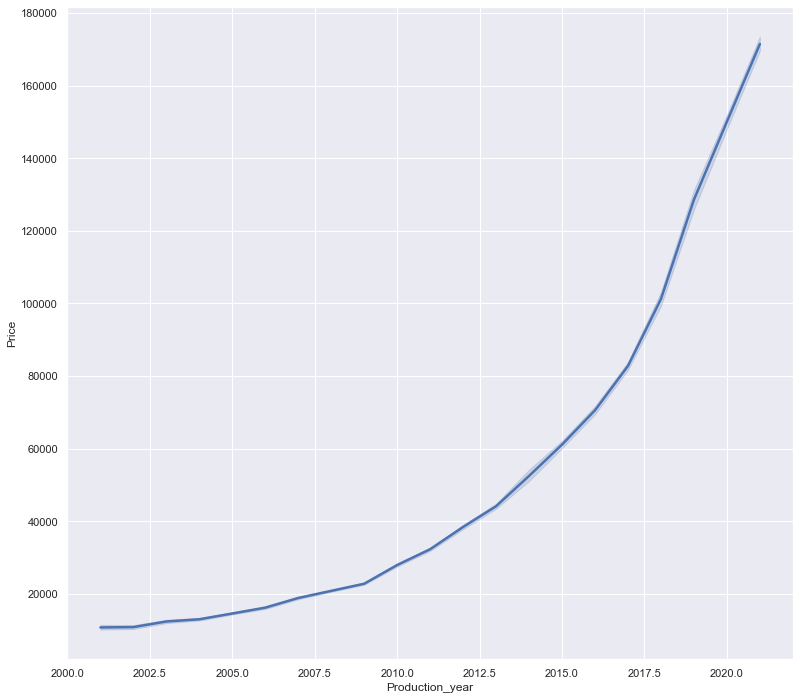

In [164]:
sns.lineplot(data=data[(data['Production_year'] > 2000)],
             x='Production_year', y='Price', palette="tab10", linewidth=2.5);

Now that we got rid of the outliers we can have a clear look at our prices which seem to increase with the increase of the production year of the car. Newer cars in newer years means higher prices.

### let's investigate the number of cars with origin inside the counry, it makes sense that poland would have polish cars, but why exactly is this number so much higher than other origin countries ?

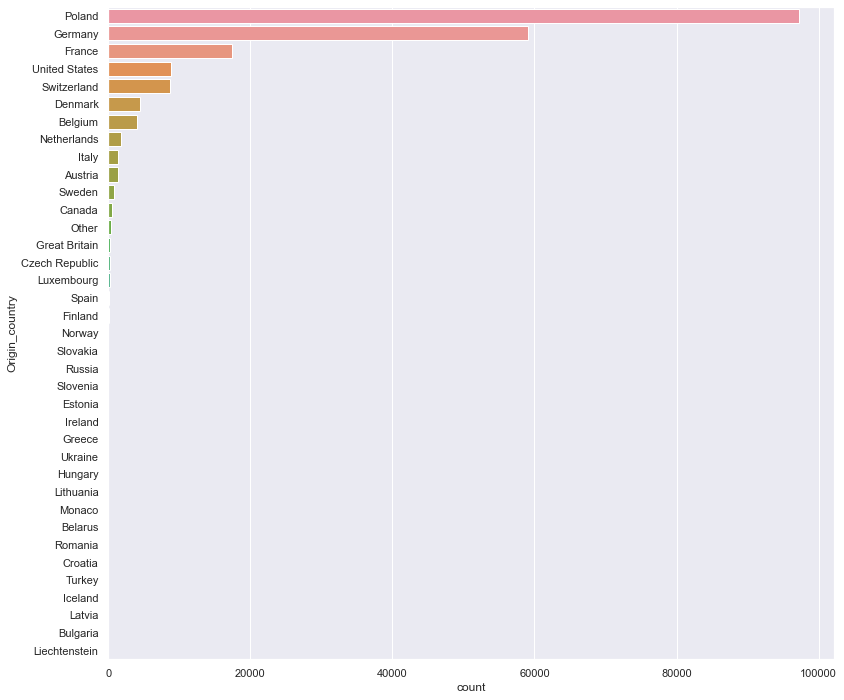

In [165]:
sns.countplot(y=data['Origin_country'], order=data['Origin_country'].value_counts().index);

If you look, you can immediately notice how much more cars are being sold by Polish companies. Buy why?

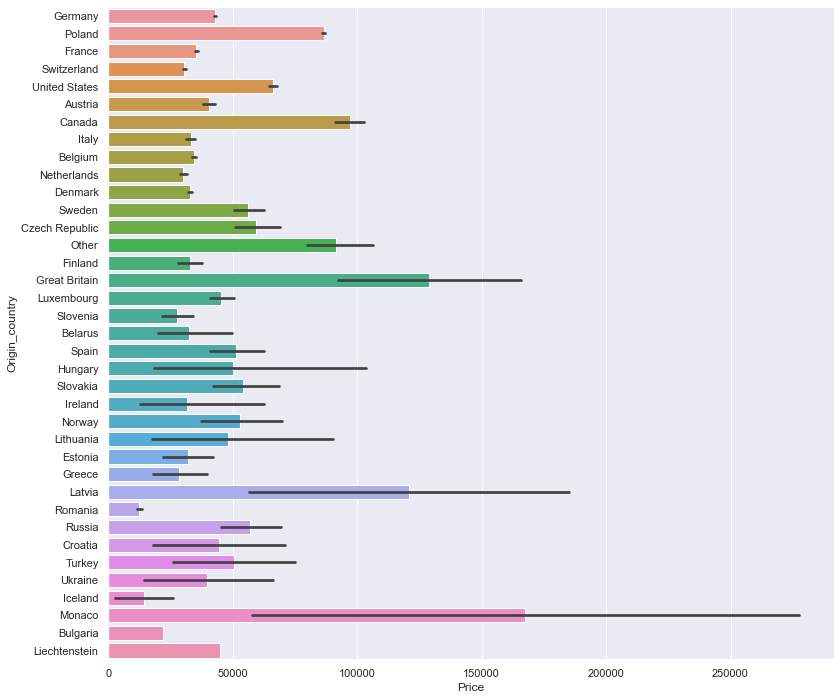

In [166]:
# country_origin and price
sns.barplot(y=data['Origin_country'], x=data['Price']);

let's take a look at the price for polish cars compared to other car countries...It's not the most expensive car country but it's also not the cheapest one. While we could argue that the average prices could be a good indicator for this let's look at some other features.

I think some good indicators of that could be Fuel_type and Type.

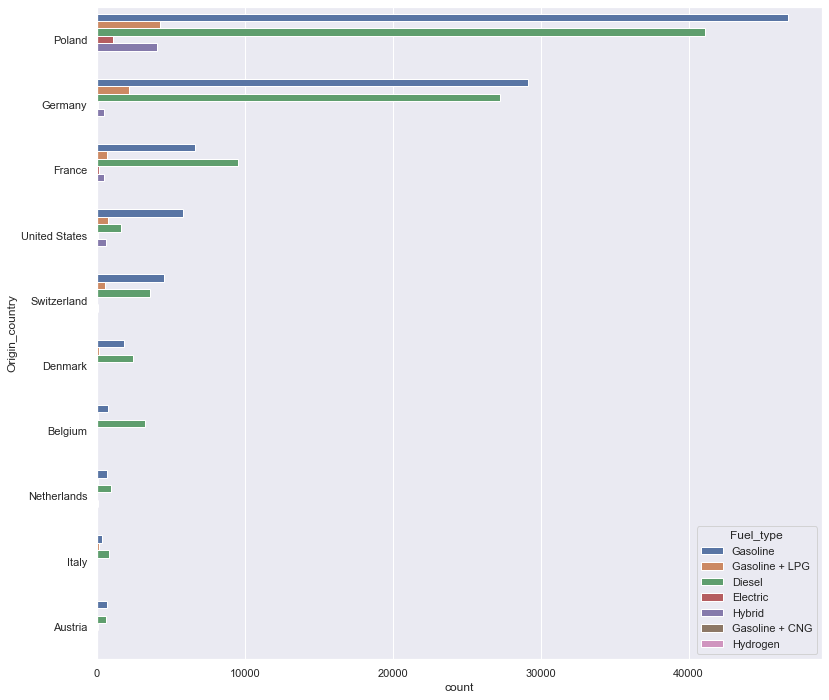

In [167]:
# origin_country and fuel_type
sns.countplot(y=data['Origin_country'][data['Origin_country'].isin(data['Origin_country'].value_counts()[:10].index)
],hue=data['Fuel_type'],
              order=data['Origin_country'].value_counts()[:10].index);

as you can see most cars produced in poland tend to use gasoline(petrol) as fuel and after that diesel.

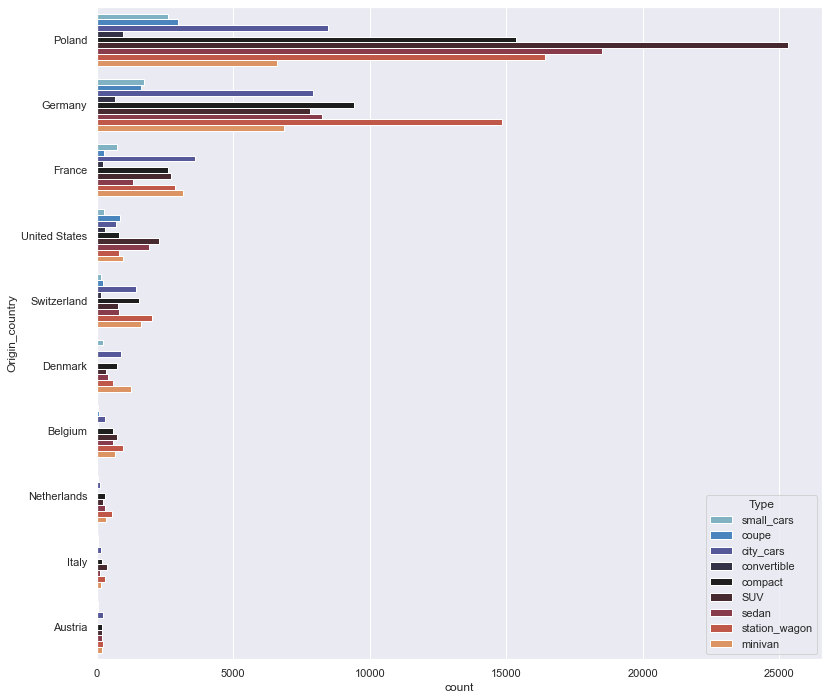

In [168]:
# origin_country and type

sns.countplot(y=data['Origin_country'][data['Origin_country'].isin(data['Origin_country'].value_counts()[:10].index)
],hue=data['Type'],
              order=data['Origin_country'].value_counts()[:10].index, palette='icefire');

It looks like polish people prefer compact cars and SUV's, maybe because thay're more suitable for families. so maybe Polish car companies noticed that trend and are now producing those kinds of cars.

### - is the condition correlated to anything ?

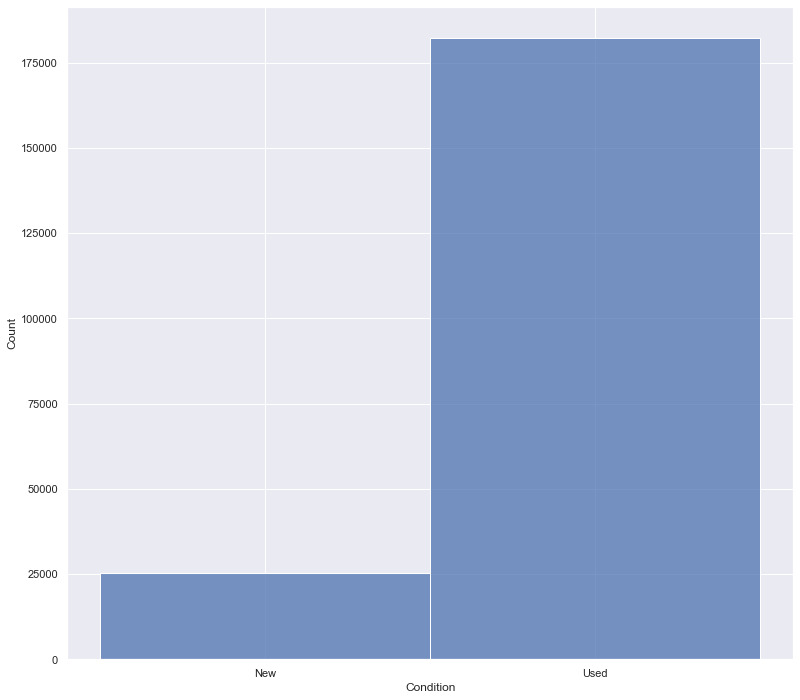

In [169]:
sns.histplot(data=data, x='Condition');

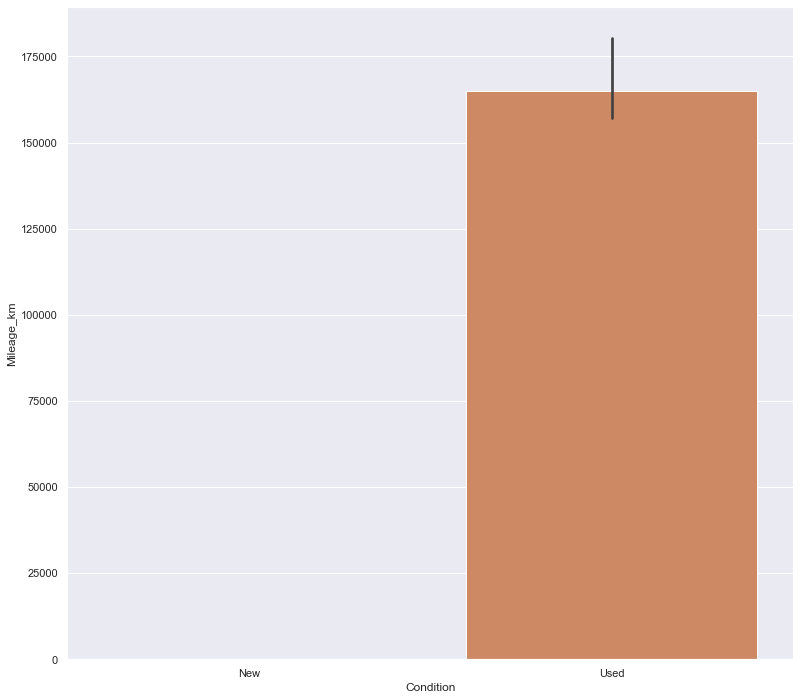

In [170]:
# condition and Mileage_km
sns.barplot(x=data['Condition'], y=data['Mileage_km']);

something important was to check if the mileage correctly classifies the car condition. So as you can see all of the used cars have driven some distance while new ones haven't driven at all. At least now we know that the our data is rational.

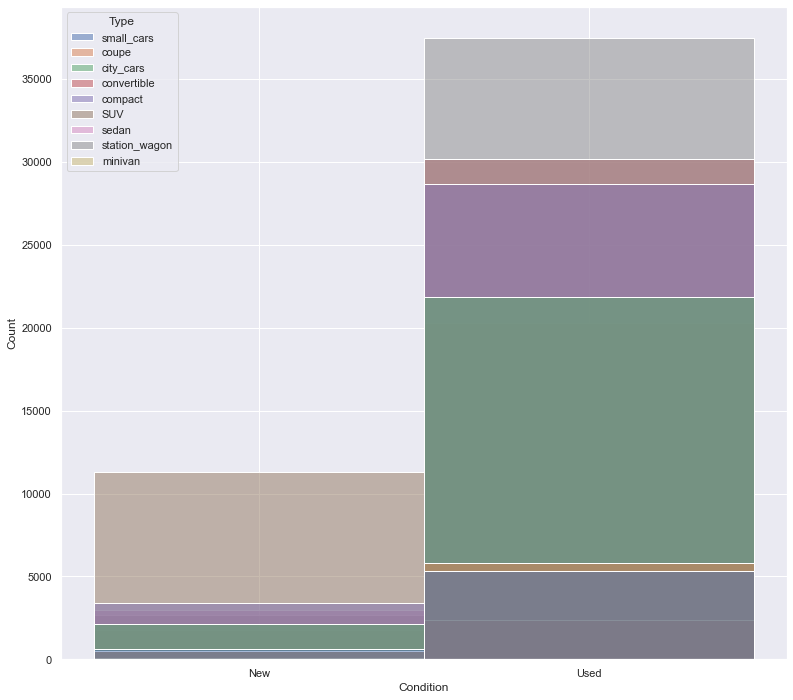

In [171]:
# condition and type
sns.histplot(data=data, x='Condition', hue='Type');

Here something is really clear. City-cars are usually sold WAY MORE as 'used' compared to 'new' city-cars so  to improve their revenue they could add a lot more used city-cars.

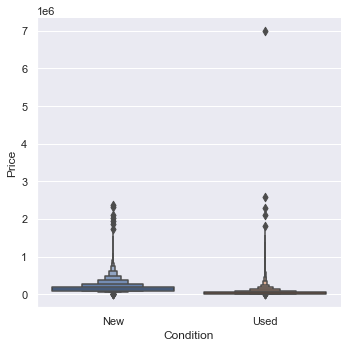

In [172]:
# condition and price
sns.catplot(x="Condition", y="Price", data=data, kind="boxen");

One surprising detail I see would be that there doesn't seem to be much difference in the price of new vs used cars, but in fact we know that new cars are more expensive, so maybe this plot is not appropriate for the storytelling.

Given this last discovery, maybe we need to look at this in another way:

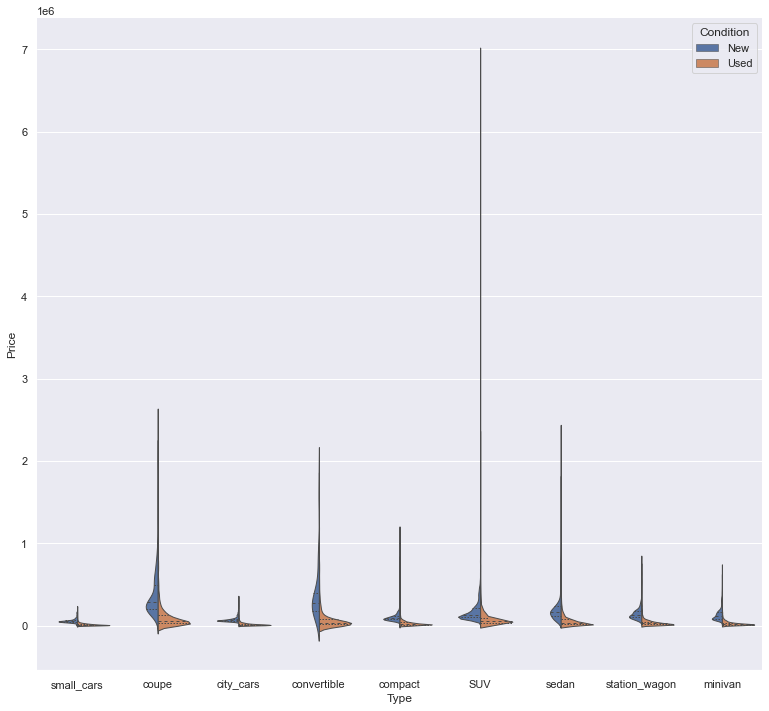

In [173]:
# condition, price and type

sns.violinplot(data=data, x="Type", y="Price", hue="Condition",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)



This violin plot shows what the box-plots couldn't: NEWER CARS DO TEND TO BE MORE EXPENSIVE!

### - does production year say anything ?

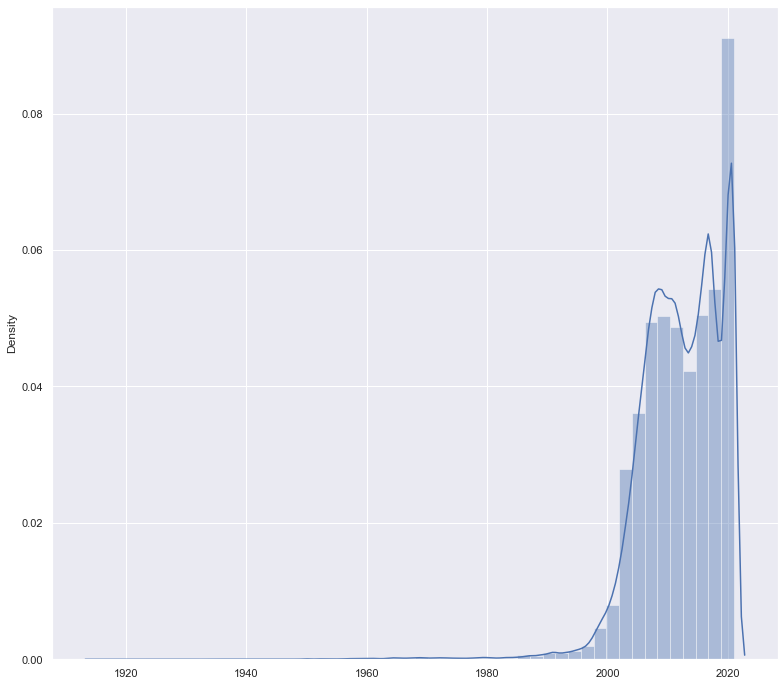

In [174]:
sns.distplot(x=data['Production_year']);

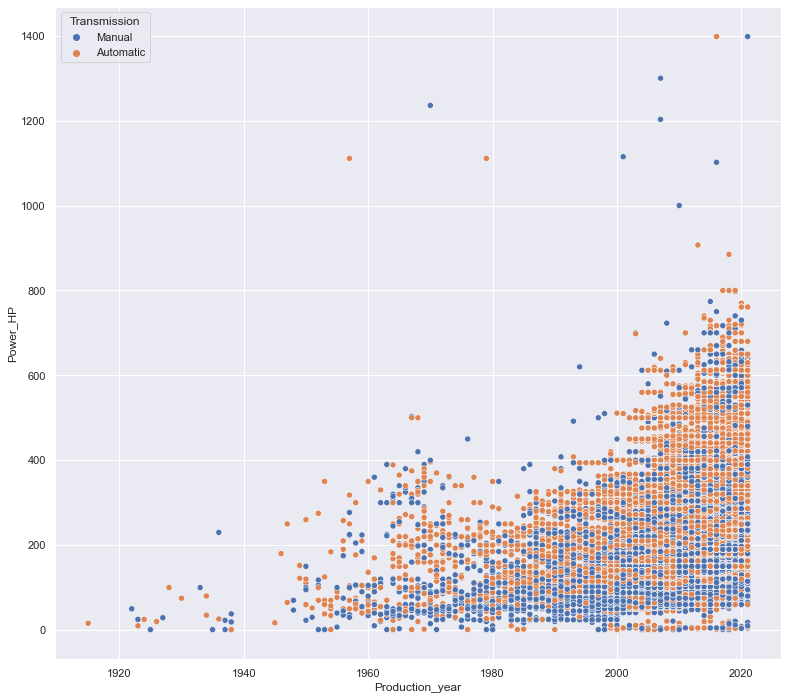

In [175]:
# Production_year, Power_HP ans Transmission

sns.scatterplot(data=data, x='Production_year', y='Power_HP', hue='Transmission');

A small thing to notice about the evolution of car sales in poland is that alot of these cars have evolved in performance as well as adapted automatic transmission over the years.

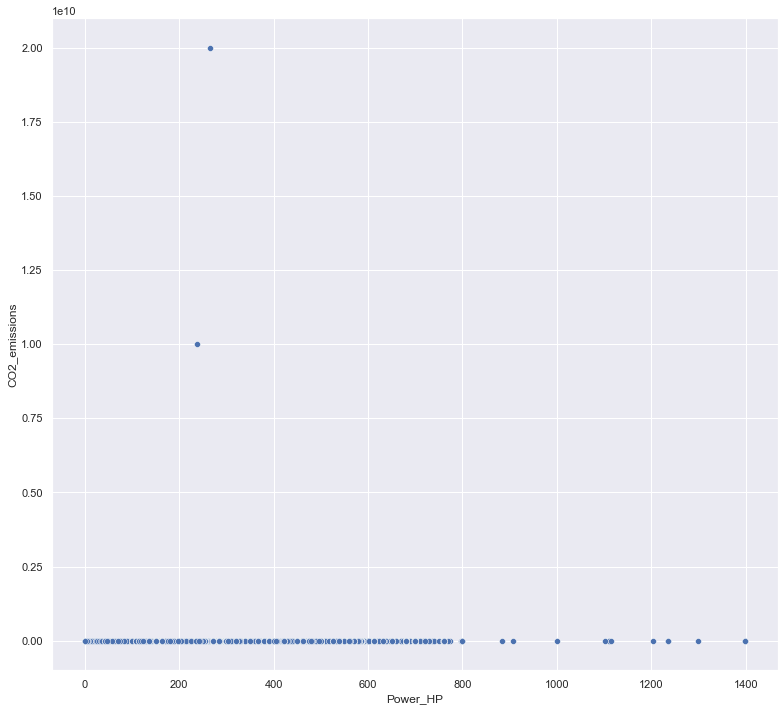

In [176]:
# Power_HP and CO2_emissions
sns.scatterplot(data=data, x='Power_HP', y='CO2_emissions');

There seems to be something wrong with the column.I don't think the car condition has anything to do with it.

### - what's up with the C02-Emission. Why is it all so skewed ?


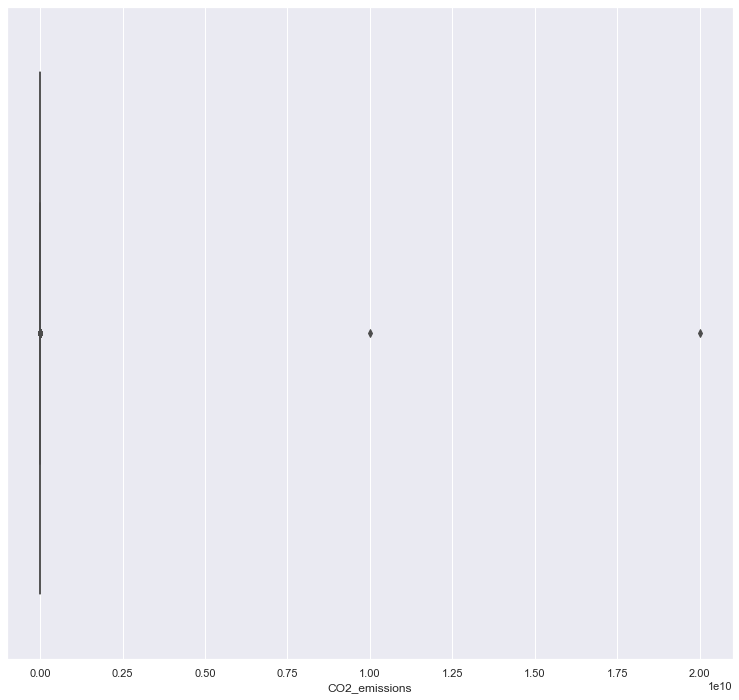

In [177]:
sns.boxplot(data['CO2_emissions']);

In [178]:
data['CO2_emissions'].describe()

count    2.076030e+05
mean     1.446628e+05
std      4.907580e+07
min      1.000000e+00
25%      1.320000e+02
50%      1.420000e+02
75%      1.590000e+02
max      2.000000e+10
Name: CO2_emissions, dtype: float64

In [179]:
data['CO2_emissions'].sort_values(ascending=False)[:15]

30810     2.000000e+10
90254     1.000000e+10
30563     1.000000e+06
95783     5.555550e+05
52031     1.251320e+05
162031    1.191300e+05
162038    1.191300e+05
18958     6.660000e+02
87952     4.950000e+02
47811     4.900000e+02
46983     4.880000e+02
87967     4.500000e+02
18234     4.230000e+02
18233     4.230000e+02
18232     4.230000e+02
Name: CO2_emissions, dtype: float64

In [180]:
print('Smallest before outliers ==>',1.191300e+05, '|| Biggest before outliers ==>',6.660000e+02)

Smallest before outliers ==> 119130.0 || Biggest before outliers ==> 666.0


From our boxplot as well as just looking at the data we can see that starting from 119130.0, there have to be some kind of outliers. So we could remove everything bigger than 666.0.

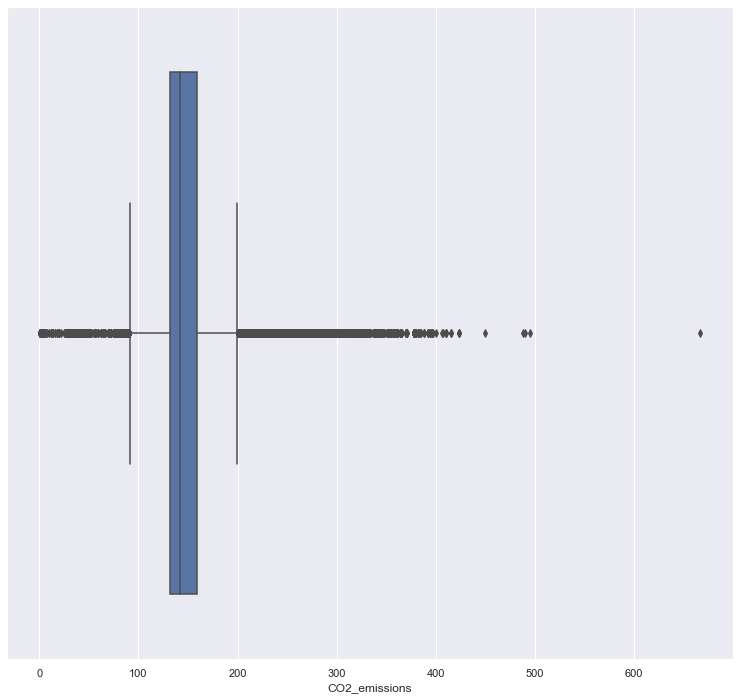

In [181]:
sns.boxplot(data['CO2_emissions'][(data['CO2_emissions'] < 1.191300e+05)]);

Now this looks a bit more realistic.

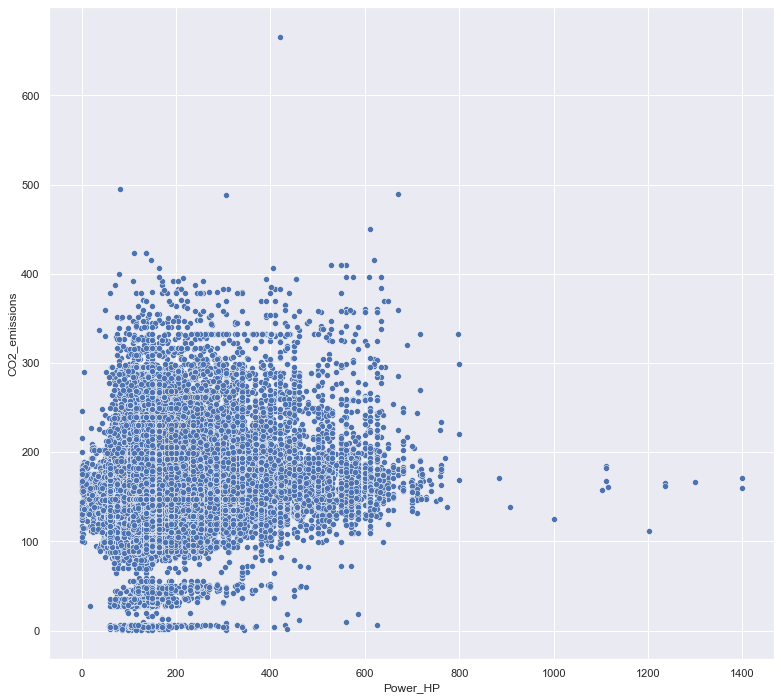

In [182]:
# Power_HP and CO2_emissions

sns.scatterplot(data=data[(data['CO2_emissions'] < 1.191300e+05)], x='Power_HP', y='CO2_emissions');

as we can observe despite higher hps the co2-emission is not that much high which can be explained by developping technology in the matter of engines and fuels in recent years.

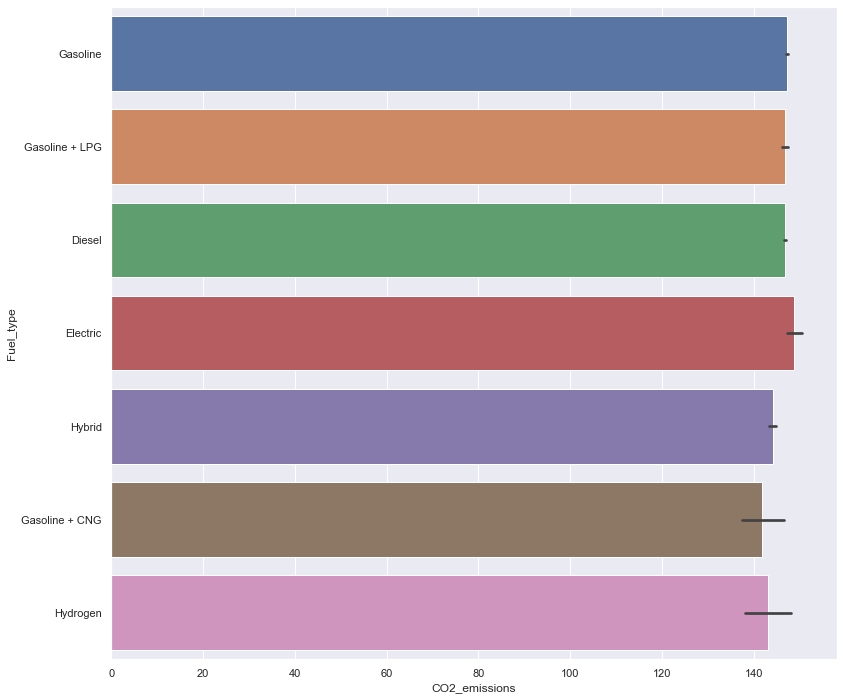

In [183]:
# CO2_emissions and Fuel_type

sns.barplot(data=data[(data['CO2_emissions'] < 1.191300e+05)],
             x='CO2_emissions', y='Fuel_type');

Looks like all fuel types have more or less the same co2-emission.

### - Is there anything weird about the door_numbers ?

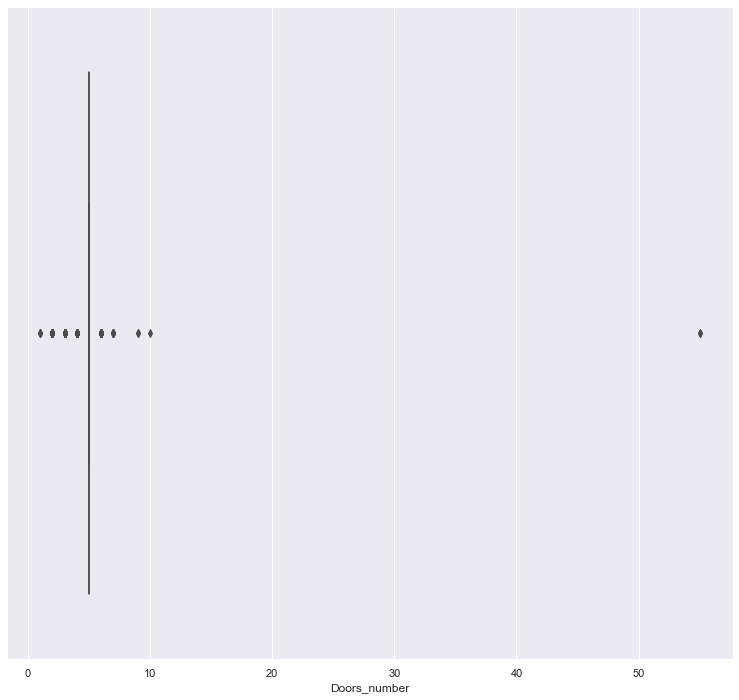

In [184]:
sns.boxplot(x=data['Doors_number']);

While It's possible to have 10 doors for certain types of vehicles, there are no cars with over 50 doors. so...



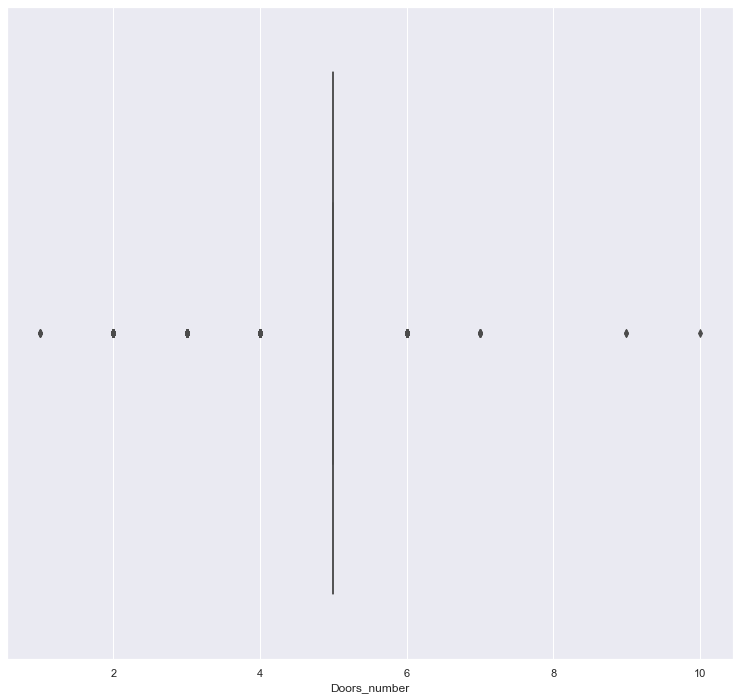

In [185]:
sns.boxplot(x=data['Doors_number'][(data['Doors_number']<50)]);

now it looks more reasonable.